# Multi-Stage ESG Analysis and Optimization Using Projection Pursuit Entropy and RAIGA for Coupling Coordination Degree Assessment

## Data Loading and Initial Inspection

In [1]:
#Importing the pandas library
import pandas as pd

# List of file paths
file_paths = [
    r"C:\Users\n\Downloads\Indicators (1)\Indicators\Indicators from ESG\Chengtun Mining Group Co Ltd盛屯矿业.xlsx",
    r"C:\Users\n\Downloads\Indicators (1)\Indicators\Indicators from ESG\Chifeng Jilong Gold Mining Co Ltd赤峰黄金.xlsx",
    r"C:\Users\n\Downloads\Indicators (1)\Indicators\Indicators from ESG\China Nonferrous Metal Industry's Foreign Engineering and Construction Co Ltd中色股份.xlsx",
    r"C:\Users\n\Downloads\Indicators (1)\Indicators\Indicators from ESG\CMOC Group Ltd洛阳钼业.xlsx",
    r"C:\Users\n\Downloads\Indicators (1)\Indicators\Indicators from ESG\Hunan Gold Corp Ltd湖南黄金.xlsx",
    r"C:\Users\n\Downloads\Indicators (1)\Indicators\Indicators from ESG\Jinduicheng Molybdenum Co Ltd金钼股份.xlsx",
    r"C:\Users\n\Downloads\Indicators (1)\Indicators\Indicators from ESG\RISING NONFERROUS METAL SH广晟有色.xlsx",
    r"C:\Users\n\Downloads\Indicators (1)\Indicators\Indicators from ESG\SHANDONG GOLD MINING CO LT山东黄金.xlsx",
    r"C:\Users\n\Downloads\Indicators (1)\Indicators\Indicators from ESG\Shengda Resources Co Ltd盛达资源.xlsx",
    r"C:\Users\n\Downloads\Indicators (1)\Indicators\Indicators from ESG\Western Mining Co Ltd西部矿业.xlsx",
    r"C:\Users\n\Downloads\Indicators (1)\Indicators\Indicators from ESG\Xizang Zhufeng Resources Co Ltd西藏珠峰.xlsx",
    r"C:\Users\n\Downloads\Indicators (1)\Indicators\Indicators from ESG\Yintai Gold Co Ltd银泰黄金.xlsx",
    r"C:\Users\n\Downloads\Indicators (1)\Indicators\Indicators from ESG\Youngy Co Ltd融捷健康.xlsx",
    r"C:\Users\n\Downloads\Indicators (1)\Indicators\Indicators from ESG\Yunnan Chihong Zinc&Germanium Co Ltd驰宏锌锗.xlsx",
    r"C:\Users\n\Downloads\Indicators (1)\Indicators\Indicators from ESG\Zhongjin Gold Corp Ltd中金黄金.xlsx",
    r"C:\Users\n\Downloads\Indicators (1)\Indicators\Indicators from ESG\Zijin Mining Group Co Ltd紫金矿业.xlsx"
]

# Load the data into a dictionary of DataFrames
data = {}
for file_path in file_paths:
    company_name = file_path.split('\\')[-1].split('.')[0]
    data[company_name] = pd.read_excel(file_path)

# Display the first few rows of each DataFrame to inspect the data
for company, df in data.items():
    print(f"\n{company} Data:\n", df.head())
print("Dataset loaded succesfully!")


Chengtun Mining Group Co Ltd盛屯矿业 Data:
   Chengtun Mining Group Co Ltd  2013  2014  2015  2016  2017  2018  2019  \
0     Nitrogen Oxide Emissions   NaN   NaN   NaN   NaN   NaN   0.0  0.01   
1        Particulate Emissions   NaN   NaN   NaN   NaN   NaN   0.0  0.00   
2    Sulphur Dioxide Emissions   NaN   NaN   NaN   NaN   NaN   0.0  0.04   
3      Sulphur Oxide Emissions   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4                  CO2 Scope 1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   2020  2021  2022     均值  
0  0.01  0.05  0.03  0.020  
1  0.00  0.00  0.00  0.000  
2  0.01  0.06  0.03  0.028  
3   NaN   NaN   NaN    NaN  
4   NaN   NaN   NaN    NaN  

Chifeng Jilong Gold Mining Co Ltd赤峰黄金 Data:
   Chifeng Jilong Gold Mining Co Ltd  2013  2014  2015  2016  2017  2018  2019  \
0         Nitrogen Oxide\nEmissions   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1             Particulate Emissions   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2     Sulphur Dioxide Emissions\n\n   N

In [2]:
#THE DATA PREPROCESSING STAGE

## Data Preprocessing

In [3]:
#imPORTing the necessary libraries for the Data preprocessing
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Function to preprocess the data
def preprocess_data(df):
    # Select only numeric columns for processing
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    df_numeric = df[numeric_columns]
    
    # Handle missing values: Fill with the mean of the column
    df_numeric = df_numeric.fillna(df_numeric.mean())
    
    # Check for any remaining NaN values
    if df_numeric.isna().any().any():
        nan_columns = df_numeric.columns[df_numeric.isna().any()].tolist()
        nan_rows = df_numeric[df_numeric.isna().any(axis=1)]
        print(f"NaN values found in columns: {nan_columns}")
        print(f"NaN values found in rows:\n{nan_rows}")
    
    # Normalize the data
    scaler = MinMaxScaler()
    df_numeric[df_numeric.columns] = scaler.fit_transform(df_numeric)
    
    # Combine the numeric data with non-numeric data
    df[numeric_columns] = df_numeric
    return df

# Apply preprocessing to each company's data
for company in data:
    data[company] = preprocess_data(data[company])

# Display the first few rows of each preprocessed DataFrame
for company, df in data.items():
    print(f"\nPreprocessed {company} Data:\n", df.head())

print("Data preprocessing done!\n")

C:\Users\n\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\n\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\n\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\n\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\n\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np

NaN values found in columns: [2013, 2014]
NaN values found in rows:
    2013  2014         2015         2016        2017         2018        2019  \
0    NaN   NaN   245.195625   157.514375   159.43875   237.635625   263.39875   
1    NaN   NaN   245.195625   157.514375   159.43875   237.635625   263.39875   
2    NaN   NaN   245.195625   157.514375   159.43875   237.635625   263.39875   
3    NaN   NaN   245.195625   157.514375   159.43875   237.635625   263.39875   
4    NaN   NaN   245.195625   157.514375   159.43875   237.635625   263.39875   
5    NaN   NaN   245.195625   157.514375   159.43875   237.635625   263.39875   
6    NaN   NaN   245.195625   157.514375   159.43875   237.635625   263.39875   
7    NaN   NaN   245.195625   157.514375   159.43875   237.635625   263.39875   
8    NaN   NaN   245.195625   157.514375   159.43875   237.635625   263.39875   
9    NaN   NaN   245.195625   157.514375   159.43875   237.635625   263.39875   
10   NaN   NaN   245.195625   157.514375 

C:\Users\n\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\n\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\n\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\n\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\n\anaconda3\lib\site-packages\sklea

NaN values found in columns: [2013, 2014]
NaN values found in rows:
    2013  2014         2015         2016      2017         2018         2019  \
0    NaN   NaN   199.578667   226.264667   151.068   149.134667   150.363333   
1    NaN   NaN   199.578667   226.264667   151.068   149.134667   150.363333   
2    NaN   NaN   199.578667   226.264667   151.068   149.134667   150.363333   
3    NaN   NaN   199.578667   226.264667   151.068   149.134667   150.363333   
4    NaN   NaN   199.578667   226.264667   151.068   149.134667   150.363333   
5    NaN   NaN   199.578667   226.264667   151.068   149.134667   150.363333   
6    NaN   NaN   199.578667   226.264667   151.068   149.134667   150.363333   
7    NaN   NaN   199.578667   226.264667   151.068   149.134667   150.363333   
8    NaN   NaN   199.578667   226.264667   151.068   149.134667   150.363333   
9    NaN   NaN   199.578667   226.264667   151.068   149.134667   150.363333   
10   NaN   NaN   199.578667   226.264667   151.068  

C:\Users\n\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\n\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\n\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


### Exploratory Data Analysis

In [17]:
# !pip install plotly

In [18]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Define a function to generate 3D scatter plots
def plot_3d_scatter(df, x_col, y_col, z_col, title):
    fig = px.scatter_3d(df, x=x_col, y=y_col, z=z_col)
    fig.update_layout(title=title)
    fig.show()

# Define a function to generate 3D surface plots as an alternative to 3D histograms
def plot_3d_surface(df, x_col, y_col, z_col, title):
    fig = go.Figure(data=[go.Surface(z=df[z_col].values, x=df[x_col].values, y=df[y_col].values)])
    fig.update_layout(title=title, scene=dict(xaxis_title=x_col, yaxis_title=y_col, zaxis_title=z_col))
    fig.show()

# Define a function to generate 3D pie charts
def plot_3d_pie_chart(df, values, names, title):
    fig = px.pie(df, values=values, names=names, title=title)
    fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
    fig.show()

# CMOC Group Ltd Data
cmoc_data = {
    "Year": [2016, 2017, 2018, 2019, 2020, 2021, 2022],
    "Nitrogen Oxide Emissions": [1.2, 1.9, 1.5, 1.8, 2.3, 24, 5.45],
    "Particulate Emissions": [7.6, 7.7, 6.9, 5.4, 6.8, 7, 6.9],
    "Sulphur Dioxide Emissions": [2.4, 3.5, 3, 2.4, 0, 0, 1.883333333],
    "GHG Scope 1": [370, 470, 480, 530, 360, 670, 480],
}

cmoc_df = pd.DataFrame(cmoc_data)

# Plot 3D scatter plot for CMOC Group Ltd
plot_3d_scatter(cmoc_df, 'Nitrogen Oxide Emissions', 'Particulate Emissions', 'Sulphur Dioxide Emissions', '3D Scatter Plot for CMOC Group Ltd')

# Zijin Mining Group Co Ltd Data
zijin_data = {
    "Year": [2016, 2017, 2018, 2019, 2020, 2021, 2022],
    "Nitrogen Oxide Emissions": [1.08, 0.98, 0.88, 0.96, 0.77, 0.89, 0.8],
    "Particulate Emissions": [0.64, 0.65, 0.75, 0.62, 0.64, 0.65, 0.62],
    "Sulphur Dioxide Emissions": [2.1, 1.93, 1.33, 1.38, 1.34, 1.48, 1.25],
    "CO2 Scope 1": [350.16, 418.42, 449.77, 692.29, 1628.49, 2206.14, 1940.54],
    "CO2 Scope 2": [1348.32, 1491.01, 1674.69, 1725.25, 2401.67, 3002.28, 1940.54],
    "Hazardous Waste": [285.95, 259.51, 309.82, 414.01, 79.29, 357.21, 320.81],
    "Total Waste": [156045, 239326, 191792, 538624, 652259, 756425, 868611],
}

zijin_df = pd.DataFrame(zijin_data)

# Plot 3D surface plot for Zijin Mining Group Co Ltd
plot_3d_surface(zijin_df, 'Nitrogen Oxide Emissions', 'Particulate Emissions', 'Sulphur Dioxide Emissions', '3D Surface Plot for Zijin Mining Group Co Ltd')

# Create pie chart data for Zijin Mining Group Co Ltd
pie_chart_data = {
    "Indicators": ["Nitrogen Oxide Emissions", "Particulate Emissions", "Sulphur Dioxide Emissions", "CO2 Scope 1", "CO2 Scope 2"],
    "Values": [0.908571429, 0.665, 1.544285714, 957.545, 1940.536667],
}

pie_df = pd.DataFrame(pie_chart_data)

In [19]:
# Plot 3D pie chart for Zijin Mining Group Co Ltd
plot_3d_pie_chart(pie_df, 'Values', 'Indicators', '3D Pie Chart for Zijin Mining Group Co Ltd')


In [20]:
# !pip install pandas plotly

In [21]:
import pandas as pd
import plotly.graph_objects as go

# Define a function to generate 3D scatter plots
def plot_3d_scatter(df, x_col, y_col, z_col, title):
    fig = go.Figure(data=[go.Scatter3d(
        x=df[x_col], 
        y=df[y_col], 
        z=df[z_col], 
        mode='markers',
        marker=dict(
            size=5,
            color=df[z_col],                # set color to an array/list of desired values
            colorscale='Viridis',           # choose a colorscale
            opacity=0.8
        )
    )])
    fig.update_layout(title=title)
    fig.show()

# CMOC Group Ltd Data
cmoc_data = {
    "Year": [2016, 2017, 2018, 2019, 2020, 2021, 2022],
    "Nitrogen Oxide Emissions": [1.2, 1.9, 1.5, 1.8, 2.3, 24, 5.45],
    "Particulate Emissions": [7.6, 7.7, 6.9, 5.4, 6.8, 7, 6.9],
    "Sulphur Dioxide Emissions": [2.4, 3.5, 3, 2.4, 0, 0, 1.88],
    "GHG Scope 1": [370, 470, 480, 530, 360, 670, 480],
}

cmoc_df = pd.DataFrame(cmoc_data)

# Plot 3D scatter plot for CMOC Group Ltd
plot_3d_scatter(cmoc_df, 'Nitrogen Oxide Emissions', 'Particulate Emissions', 'Sulphur Dioxide Emissions', 'Scatter Plot for CMOC Group Ltd')


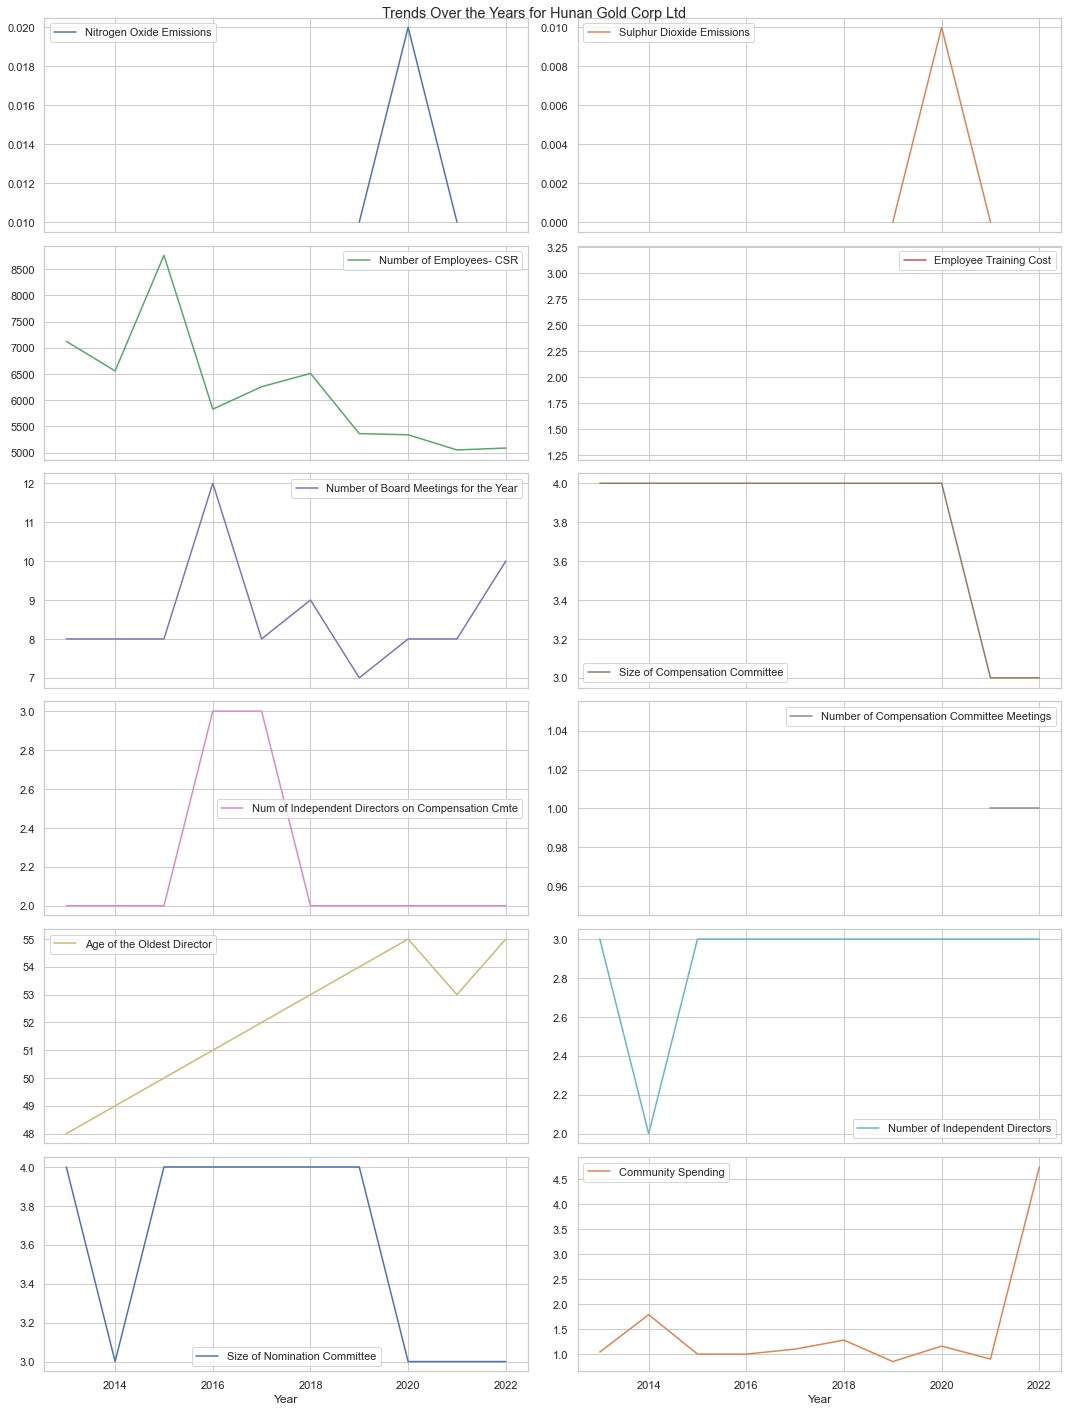

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Data for Hunan Gold Corp Ltd
hunan_gold_data = {
    'Year': list(range(2013, 2023)),
    'Nitrogen Oxide Emissions': [None, None, None, None, None, None, 0.01, 0.02, 0.01, None],
    'Sulphur Dioxide Emissions': [None, None, None, None, None, None, 0, 0.01, 0, None],
    'Number of Employees- CSR': [7123, 6559, 8765, 5829, 6257, 6511, 5362, 5340, 5051, 5087],
    'Employee Training Cost': [1.3, None, None, 3.17, None, None, None, None, None, None],
    'Number of Board Meetings for the Year': [8, 8, 8, 12, 8, 9, 7, 8, 8, 10],
    'Size of Compensation Committee': [4, 4, 4, 4, 4, 4, 4, 4, 3, 3],
    'Num of Independent Directors on Compensation Cmte': [2, 2, 2, 3, 3, 2, 2, 2, 2, 2],
    'Number of Compensation Committee Meetings': [None, None, None, None, None, None, None, None, 1, 1],
    'Age of the Oldest Director': [48, 49, 50, 51, 52, 53, 54, 55, 53, 55],
    'Number of Independent Directors': [3, 2, 3, 3, 3, 3, 3, 3, 3, 3],
    'Size of Nomination Committee': [4, 3, 4, 4, 4, 4, 4, 3, 3, 3],
    'Community Spending': [1.04, 1.79, 1, 1, 1.1, 1.28, 0.85, 1.16, 0.9, 4.75]
}

# Convert the dictionary to a DataFrame
df_hunan_gold = pd.DataFrame(hunan_gold_data)

# Function to plot trends for the given DataFrame
def plot_company_trends(df, company_name):
    df.plot(x='Year', subplots=True, layout=(6, 2), figsize=(15, 20), title=f'Trends Over the Years for {company_name}')
    plt.tight_layout()
    plt.show()

# Plot trends for Hunan Gold Corp Ltd
plot_company_trends(df_hunan_gold, 'Hunan Gold Corp Ltd')


In [23]:
import pandas as pd
import plotly.graph_objects as go

# Chifeng Jilong Gold Mining Co Ltd Data
chifeng_data = {
    "Year": [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    "Number of Employees - CSR": [3667, 2268, 2303, 3546, 3956, 3863, 4715, 5137],
    "Audit Committee Meetings": [9, 5, 4, 5, 7, 6, 6, 5],
    "Board Size": [7, 7, 7, 9, 8, 11, 11, 14],
    "Number of Executives / Company Managers": [5, 6, 6, 5, 4, 6, 7, 8],
    "Number of Non Executive Directors on Board": [4, 5, 5, 5, 6, 6, 6, 9],
    "Number of Board Meetings for the Year": [15, 11, 6, 12, 12, 15, 11, 12],
    "Size of Compensation Committee": [3, 3, 3, 3, 2, 5, 5, 4],
    "Num of Independent Directors on Compensation Cmte": [2, 2, 2, 2, 2, 3, 3, 3],
    "Age of the Youngest Director": [39, 40, 41, 42, 43, 44, 45, 46],
    "Age of the Oldest Director": [61, 62, 63, 62, 63, 64, 65, 67],
    "Number of Independent Directors": [3, 3, 3, 3, 3, 4, 4, 4],
    "Size of Nomination Committee": [3, 3, 3, 3, 3, 3, 3, 4],
    "Community Spending": [0.13, 0.23, 0.02, 0.17, 0.38, 1.15, 17.35, 0.94]
}

chifeng_df = pd.DataFrame(chifeng_data)

# Function to plot 3D scatter plot
def plot_3d_scatter(df, x_col, y_col, z_col, title):
    fig = go.Figure(data=[go.Scatter3d(
        x=df[x_col],
        y=df[y_col],
        z=df[z_col],
        mode='markers',
        marker=dict(
            size=12,
            color=df[z_col],                # set color to an array/list of desired values
            colorscale='Viridis',           # choose a colorscale
            opacity=0.8
        )
    )])
    fig.update_layout(
        title=title,
        scene=dict(
            xaxis_title=x_col,
            yaxis_title=y_col,
            zaxis_title=z_col,
        )
    )
    fig.show()

# Plot 3D scatter plot for Chifeng Jilong Gold Mining Co Ltd
plot_3d_scatter(chifeng_df, 'Year', 'Number of Employees - CSR', 'Community Spending', '3D Scatter Plot for Chifeng Jilong Gold Mining Co Ltd')



In [24]:
import pandas as pd
import plotly.graph_objects as go

# Chifeng Jilong Gold Mining Co Ltd Data
chifeng_data = {
    "Year": [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    "Number of Employees - CSR": [3667, 2268, 2303, 3546, 3956, 3863, 4715, 5137],
    "Audit Committee Meetings": [9, 5, 4, 5, 7, 6, 6, 5],
    "Board Size": [7, 7, 7, 9, 8, 11, 11, 14],
    "Number of Executives / Company Managers": [5, 6, 6, 5, 4, 6, 7, 8],
    "Number of Non Executive Directors on Board": [4, 5, 5, 5, 6, 6, 6, 9],
    "Number of Board Meetings for the Year": [15, 11, 6, 12, 12, 15, 11, 12],
    "Size of Compensation Committee": [3, 3, 3, 3, 2, 5, 5, 4],
    "Num of Independent Directors on Compensation Cmte": [2, 2, 2, 2, 2, 3, 3, 3],
    "Age of the Youngest Director": [39, 40, 41, 42, 43, 44, 45, 46],
    "Age of the Oldest Director": [61, 62, 63, 62, 63, 64, 65, 67],
    "Number of Independent Directors": [3, 3, 3, 3, 3, 4, 4, 4],
    "Size of Nomination Committee": [3, 3, 3, 3, 3, 3, 3, 4],
    "Community Spending": [0.13, 0.23, 0.02, 0.17, 0.38, 1.15, 17.35, 0.94]
}

chifeng_df = pd.DataFrame(chifeng_data)

# Function to plot 3D histogram
def plot_3d_histogram(df, x_col, y_col, z_col, title):
    fig = go.Figure(data=[go.Histogram2dContour(
        x=df[x_col],
        y=df[y_col],
        z=df[z_col],
        colorscale='Viridis',
        showscale=True,
        contours=dict(
            showlabels=True,
            labelfont=dict(
                size=12,
                color='white',
            )
        )
    )])
    fig.update_layout(
        title=title,
        scene=dict(
            xaxis_title=x_col,
            yaxis_title=y_col,
            zaxis_title=z_col,
        )
    )
    fig.show()

# Plot 3D histogram for Chifeng Jilong Gold Mining Co Ltd
plot_3d_histogram(chifeng_df, 'Year', 'Number of Employees - CSR', 'Community Spending', '3D Histogram for Chifeng Jilong Gold Mining Co Ltd')


In [26]:
import pandas as pd
import plotly.graph_objects as go

# Chifeng Jilong Gold Mining Co Ltd Data
chifeng_data = {
    "Year": [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    "Number of Employees - CSR": [3667, 2268, 2303, 3546, 3956, 3863, 4715, 5137],
    "Community Spending": [0.13, 0.23, 0.02, 0.17, 0.38, 1.15, 17.35, 0.94]
}

chifeng_df = pd.DataFrame(chifeng_data)

# Function to plot 3D-like column chart
def plot_3d_like_column_chart(df, x_col, y_col, z_col, title):
    fig = go.Figure()

    # Adding a 3D-like bar trace
    fig.add_trace(go.Bar(
        x=df[x_col],
        y=df[z_col],
        name='Community Spending',
        marker=dict(color='rgba(58, 71, 80, 0.6)')
    ))

    fig.update_layout(
        title=title,
        scene=dict(
            xaxis_title=x_col,
            yaxis_title=z_col,
            zaxis_title=y_col,
        ),
        margin=dict(l=0, r=0, b=0, t=50)
    )

    fig.show()

# Plot 3D-like column chart for Chifeng Jilong Gold Mining Co Ltd
plot_3d_like_column_chart(chifeng_df, 'Year', 'Number of Employees - CSR', 'Community Spending', '3D Column Chart for Chifeng Jilong Gold Mining Co Ltd')


In [27]:
import pandas as pd
import plotly.graph_objects as go

# Chifeng Jilong Gold Mining Co Ltd Data
chifeng_data = {
    "Year": [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    "Number of Employees - CSR": [3667, 2268, 2303, 3546, 3956, 3863, 4715, 5137],
    "Community Spending": [0.13, 0.23, 0.02, 0.17, 0.38, 1.15, 17.35, 0.94]
}

chifeng_df = pd.DataFrame(chifeng_data)

# Function to plot 3D column chart
def plot_3d_column_chart(df, x_col, y_col, z_col, title):
    fig = go.Figure()

    for i in range(len(df)):
        fig.add_trace(go.Scatter3d(
            x=[df[x_col][i], df[x_col][i]],
            y=[df[y_col][i], df[y_col][i]],
            z=[0, df[z_col][i]],
            mode='lines',
            line=dict(color='blue', width=10)
        ))

    fig.update_layout(
        title=title,
        scene=dict(
            xaxis_title=x_col,
            yaxis_title=y_col,
            zaxis_title=z_col,
            camera=dict(
                eye=dict(x=1.25, y=1.25, z=1.25)
            )
        ),
        margin=dict(l=0, r=0, b=0, t=50)
    )

    fig.show()

# Plot 3D column chart for Chifeng Jilong Gold Mining Co Ltd
plot_3d_column_chart(chifeng_df, 'Year', 'Number of Employees - CSR', 'Community Spending', '3D Column Chart for Chifeng Jilong Gold Mining Co Ltd')


In [28]:
import pandas as pd
import plotly.graph_objects as go

# Shandong Gold Mining Co Ltd Data
shandong_data = {
    "Year": [2016, 2017, 2018, 2019, 2020, 2021, 2022],
    "Nitrogen Oxide Emissions": [0.01, 0.01, 0.01, 0.02, 0.02, None, None],
    "Particulate Emissions": [0.04, 0, 0.05, 0.07, 0.07, None, None],
    "Sulphur Dioxide Emissions": [0.01, 0, 0.01, 0.03, 0.01, None, None],
    "Sulphur Oxide Emissions": [0.01, 0, 0.01, 0.03, 0.01, None, None],
    "GHG Scope 1": [None, None, None, 72.3, 112.9, 168.3, None],
    "GHG Scope 2": [None, None, None, 716.8, 854.5, 1126.8, None],
    "Electricity Used": [761.9, 871.95, 1009.88, 915.2, 101.21, 991.82, 1317.74],
    "Fuel Used - Coal/Lignite": [15.36, 13.03, 3.5, 3, 7.17, 4.96, 12.89],
    "Fuel Used - Natural Gas": [None, None, None, 1691.3, 1695.1, 2021.3, 1949.1],
    "Fuel Used - Crude Oil/Diesel": [28.98, 15.3, 15.66, 14.8, 18.99, 17.21, 25.77],
    "Hazardous Waste": [None, None, None, 1435.4, 1636.1, 0.15, 0.14],
    "Total Water Withdrawal": [None, None, None, 5844.5, 1196, 6639.8, None],
    "Total Water Discharged": [None, None, None, 17713.5, 28924.9, 29198.2, None],
    "Pct Women in Workforce": [20.3, 20.94, 19.93, 19.99, 19.61, 19.2, 18.09],
    "Number of Employees - CSR": [13251, 12985, 12793, 14739, 14378, 16032, 16134],
    "Community Spending": [2.77, 1.11, None, 2.07, 2.1, 1, 0.62]
}

shandong_df = pd.DataFrame(shandong_data)

# Function to plot 3D scatter plot
def plot_3d_scatter(df, x_col, y_col, z_col, title):
    fig = go.Figure(data=[go.Scatter3d(
        x=df[x_col],
        y=df[y_col],
        z=df[z_col],
        mode='markers',
        marker=dict(
            size=10,
            color=df[z_col],
            colorscale='Viridis',
            opacity=0.8
        )
    )])
    fig.update_layout(
        title=title,
        scene=dict(
            xaxis_title=x_col,
            yaxis_title=y_col,
            zaxis_title=z_col
        )
    )
    fig.show()


# Plot 3D scatter plots for Shandong Gold Mining Co Ltd
plot_3d_scatter(shandong_df, 'Year', 'Nitrogen Oxide Emissions', 'Particulate Emissions', '3D Scatter Plot for Nitrogen Oxide vs Particulate Emissions')
plot_3d_scatter(shandong_df, 'Year', 'Sulphur Dioxide Emissions', 'Sulphur Oxide Emissions', '3D Scatter Plot for Sulphur Dioxide vs Sulphur Oxide Emissions')



In [29]:
# Function to plot 3D column chart
def plot_3d_column_chart(df, x_col, y_col, z_col, title):
    fig = go.Figure()

    for i in range(len(df)):
        fig.add_trace(go.Scatter3d(
            x=[df[x_col][i], df[x_col][i]],
            y=[df[y_col][i], df[y_col][i]],
            z=[0, df[z_col][i]],
            mode='lines',
            line=dict(color='blue', width=10)
        ))

    fig.update_layout(
        title=title,
        scene=dict(
            xaxis_title=x_col,
            yaxis_title=y_col,
            zaxis_title=z_col,
            camera=dict(
                eye=dict(x=1.25, y=1.25, z=1.25)
            )
        ),
        margin=dict(l=0, r=0, b=0, t=50)
    )

    fig.show()
# Plot 3D column charts for Shandong Gold Mining Co Ltd
plot_3d_column_chart(shandong_df, 'Year', 'Number of Employees - CSR', 'Community Spending', '3D Column Chart for Number of Employees vs Community Spending')
plot_3d_column_chart(shandong_df, 'Year', 'GHG Scope 1', 'GHG Scope 2', '3D Column Chart for GHG Scope 1 vs GHG Scope 2')


In [37]:
import pandas as pd
import plotly.graph_objects as go

# Sample data for Shandong Gold Mining Co Ltd
shandong_data = {
    "Year": [2016, 2017, 2018, 2019, 2020, 2021, 2022],
    "Nitrogen Oxide Emissions": [0.01, 0.01, 0.01, 0.02, 0.02, None, None],
    "Particulate Emissions": [0.04, 0, 0.05, 0.07, 0.07, None, None],
    "Sulphur Dioxide Emissions": [0.01, 0, 0.01, 0.03, 0.01, None, None],
    "Sulphur Oxide Emissions": [0.01, 0, 0.01, 0.03, 0.01, None, None],
    "GHG Scope 1": [None, None, None, 72.3, 112.9, 168.3, None],
    "GHG Scope 2": [None, None, None, 716.8, 854.5, 1126.8, None],
    "Electricity Used": [761.9, 871.95, 1009.88, 915.2, 101.21, 991.82, 1317.74],
    "Fuel Used - Coal/Lignite": [15.36, 13.03, 3.5, 3, 7.17, 4.96, 12.89],
    "Fuel Used - Natural Gas": [None, None, None, 1691.3, 1695.1, 2021.3, 1949.1],
    "Fuel Used - Crude Oil/Diesel": [28.98, 15.3, 15.66, 14.8, 18.99, 17.21, 25.77],
    "Hazardous Waste": [None, None, None, 1435.4, 1636.1, 0.15, 0.14],
    "Total Water Withdrawal": [None, None, None, 5844.5, 1196, 6639.8, None],
    "Total Water Discharged": [None, None, None, 17713.5, 28924.9, 29198.2, None],
    "Pct Women in Workforce": [20.3, 20.94, 19.93, 19.99, 19.61, 19.2, 18.09],
    "Number of Employees - CSR": [13251, 12985, 12793, 14739, 14378, 16032, 16134],
    "Community Spending": [2.77, 1.11, None, 2.07, 2.1, 1, 0.62]
}

shandong_df = pd.DataFrame(shandong_data)

# Function to plot 3D column chart using Mesh3d
def plot_3d_column_chart(df, x_col, y_col, z_col, title):
    fig = go.Figure()

    for i in range(len(df)):
        # Create a 3D column as a Mesh3d object
        fig.add_trace(go.Mesh3d(
            x=[df[x_col][i], df[x_col][i], df[x_col][i]+0.1, df[x_col][i]+0.1, df[x_col][i], df[x_col][i], df[x_col][i]+0.1, df[x_col][i]+0.1],
            y=[df[y_col][i], df[y_col][i], df[y_col][i], df[y_col][i], df[y_col][i]+0.1, df[y_col][i]+0.1, df[y_col][i]+0.1, df[y_col][i]+0.1],
            z=[0, df[z_col][i], df[z_col][i], 0, 0, df[z_col][i], df[z_col][i], 0],
            color='red',
            opacity=0.6
        ))

    fig.update_layout(
        title=title,
        scene=dict(
            xaxis_title=x_col,
            yaxis_title=y_col,
            zaxis_title=z_col,
            camera=dict(
                eye=dict(x=1.25, y=1.25, z=1.25)
            )
        ),
        margin=dict(l=0, r=0, b=0, t=50)
    )

    fig.show()

# Plot 3D column charts for Shandong Gold Mining Co Ltd
plot_3d_column_chart(shandong_df, 'Year', 'Number of Employees - CSR', 'Community Spending', '3D Column Chart for Number of Employees vs Community Spending')
plot_3d_column_chart(shandong_df, 'Year', 'GHG Scope 1', 'GHG Scope 2', '3D Column Chart for GHG Scope 1 vs GHG Scope 2')


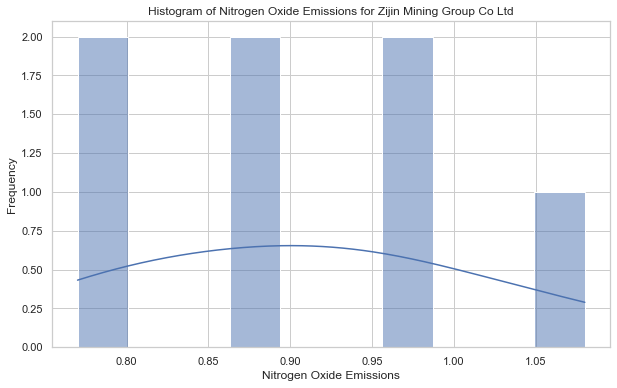

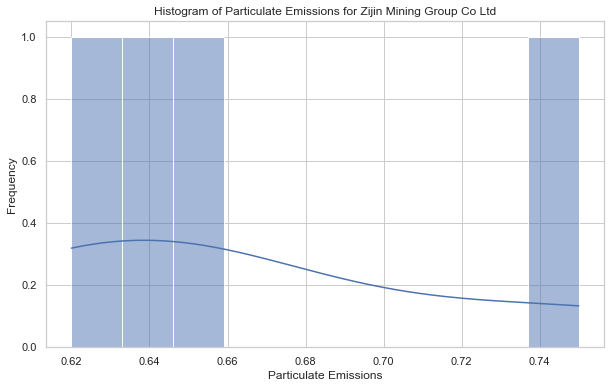

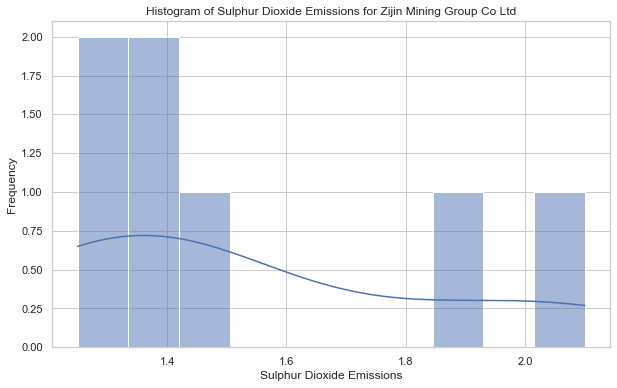

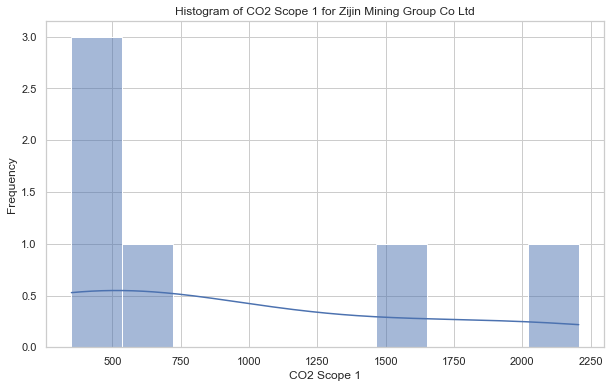

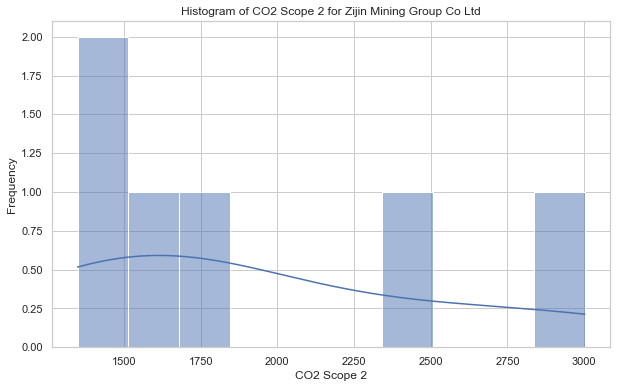

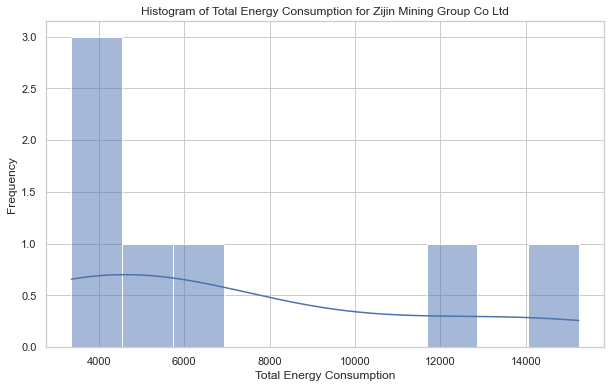

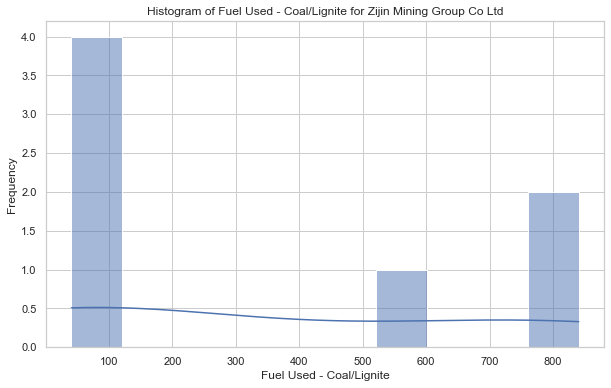

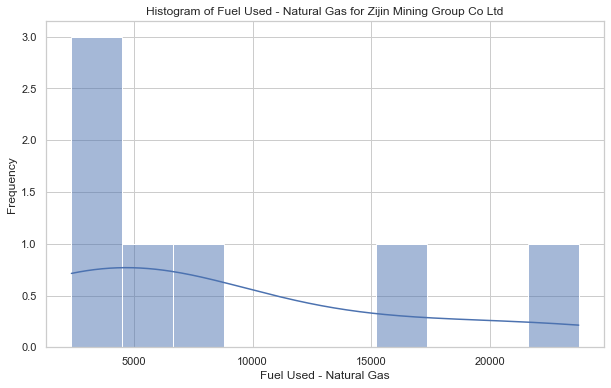

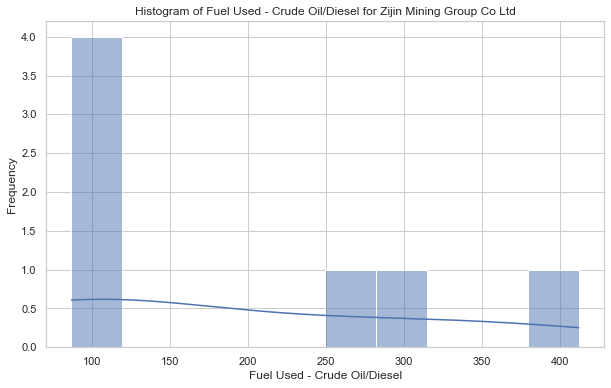

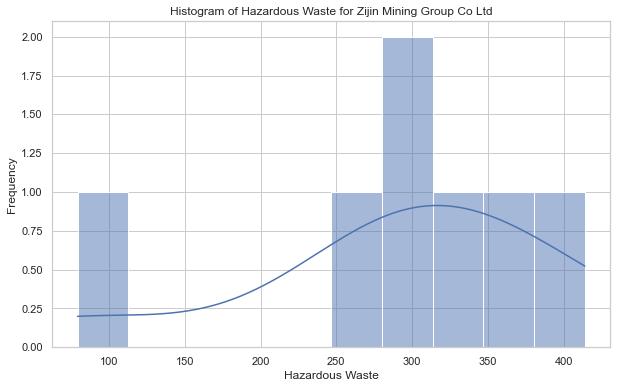

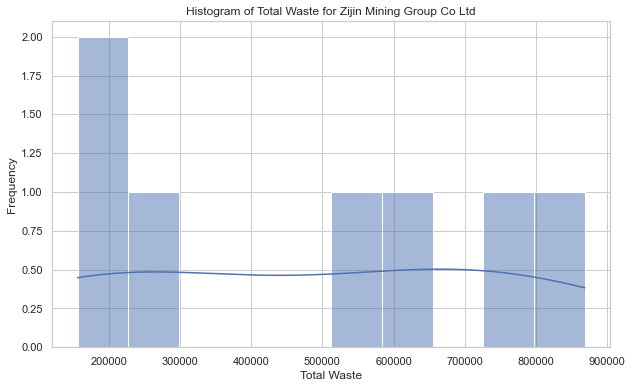

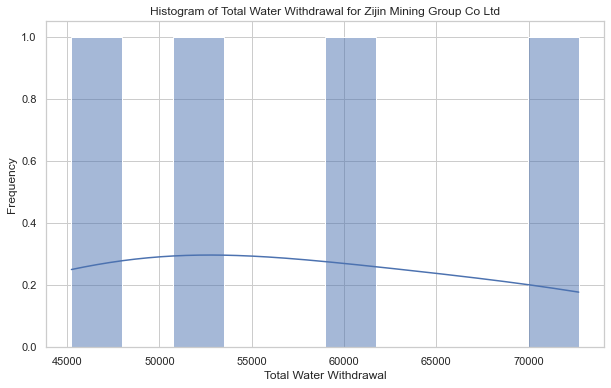

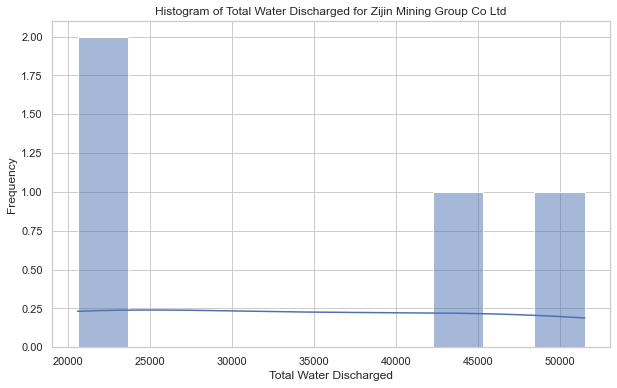

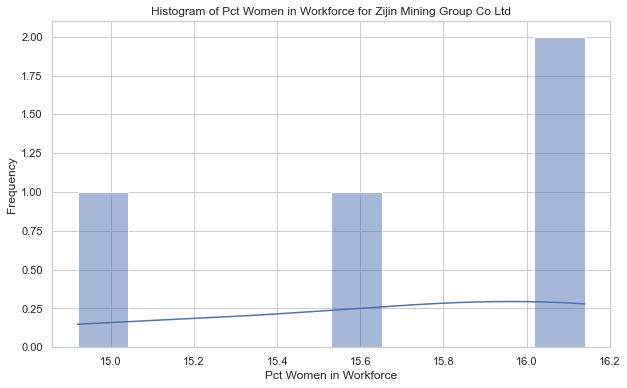

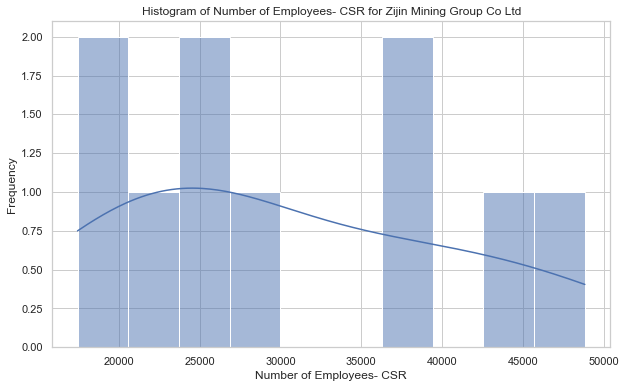

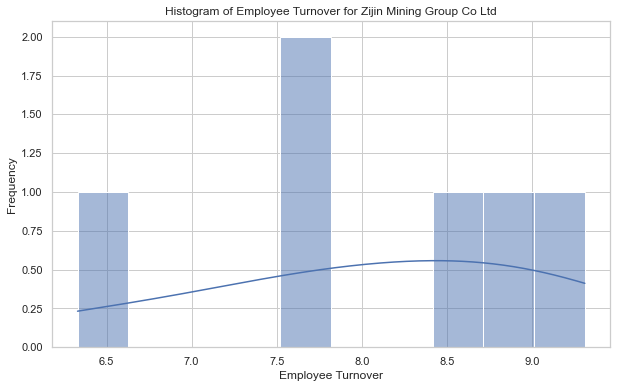

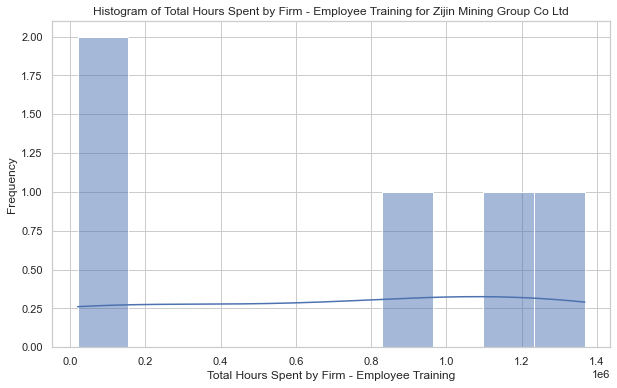

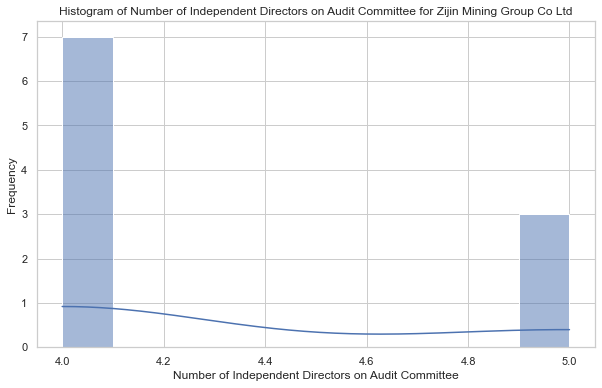

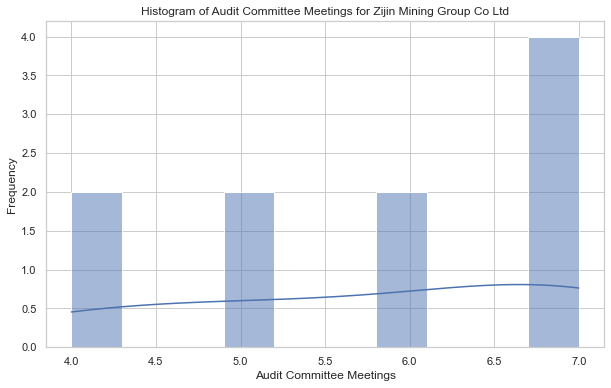

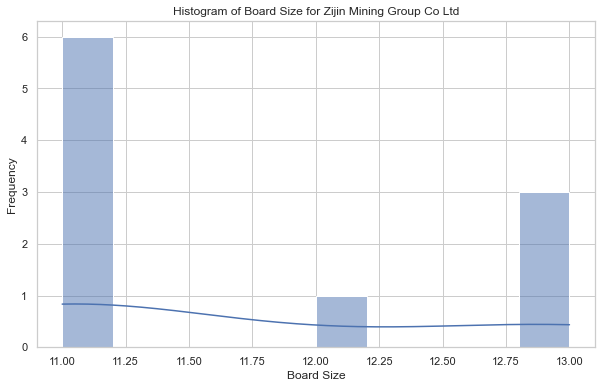

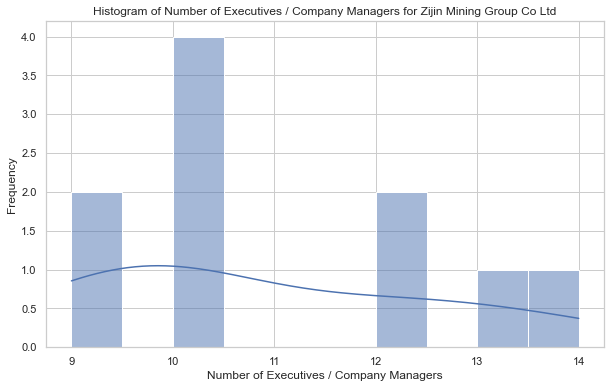

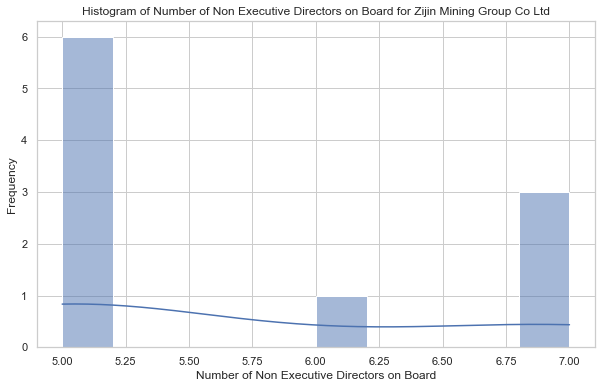

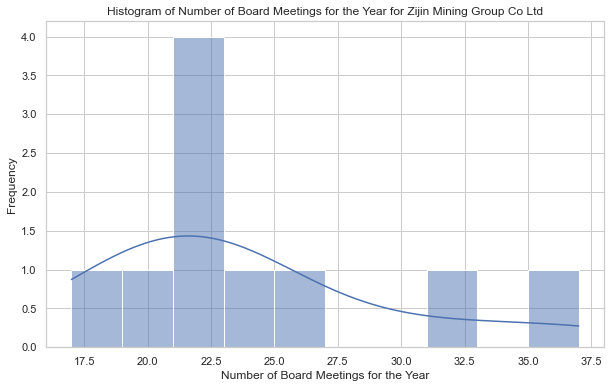

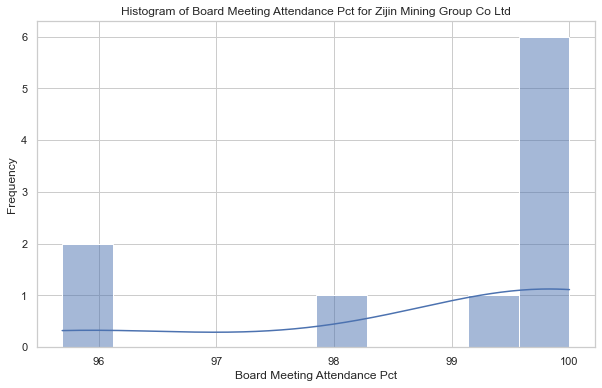

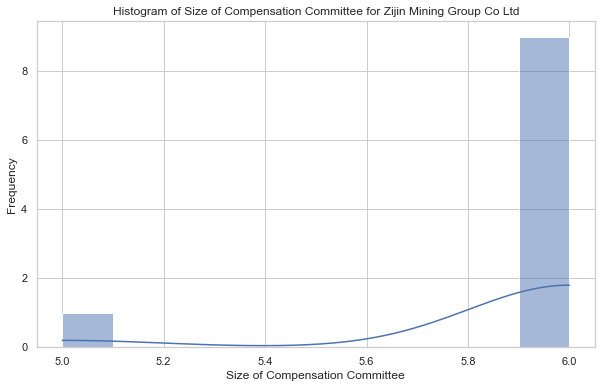

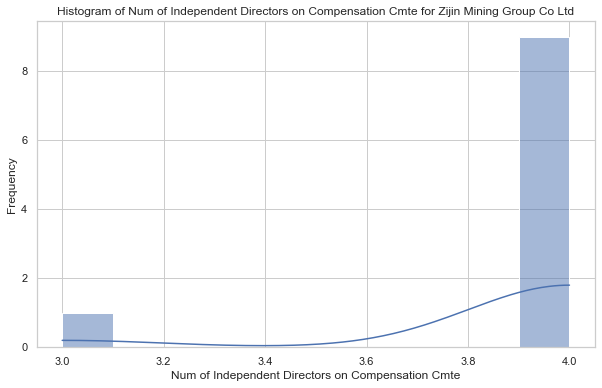

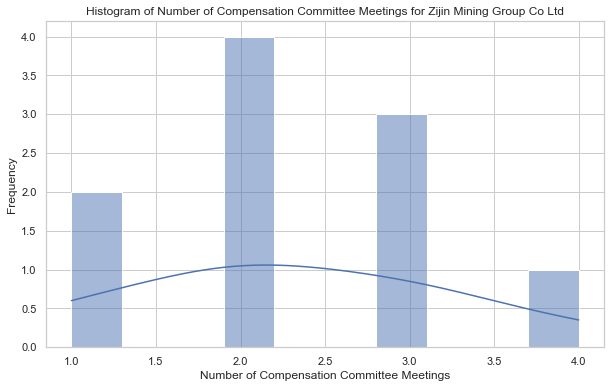

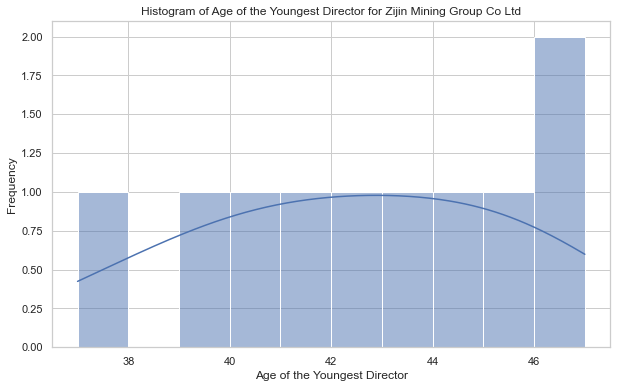

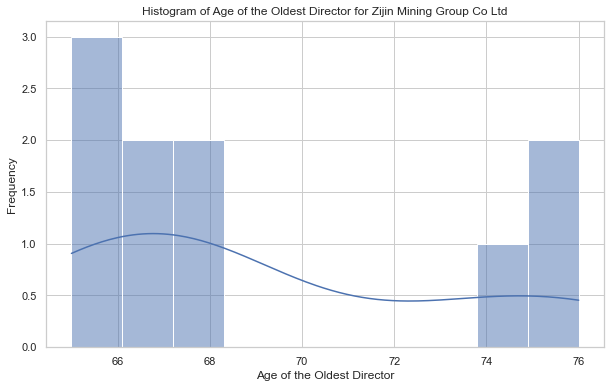

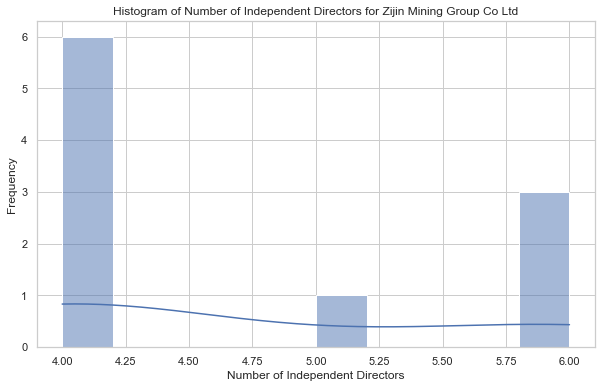

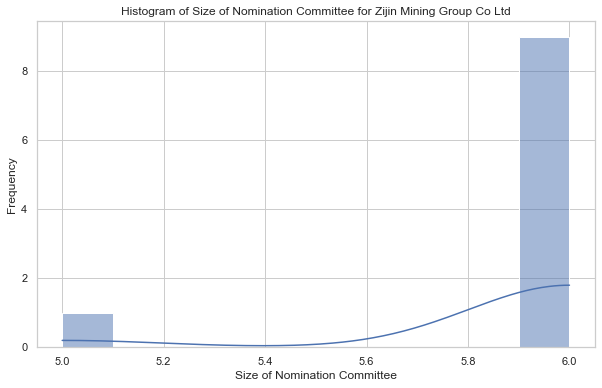

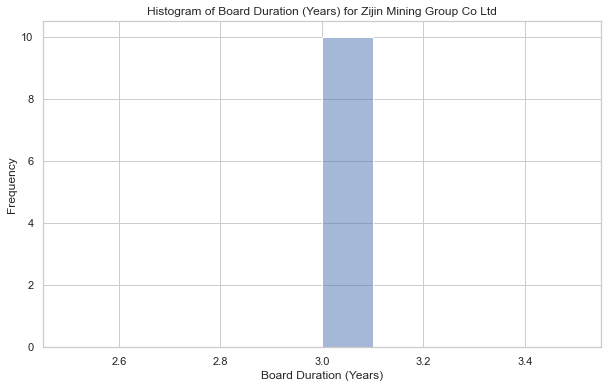

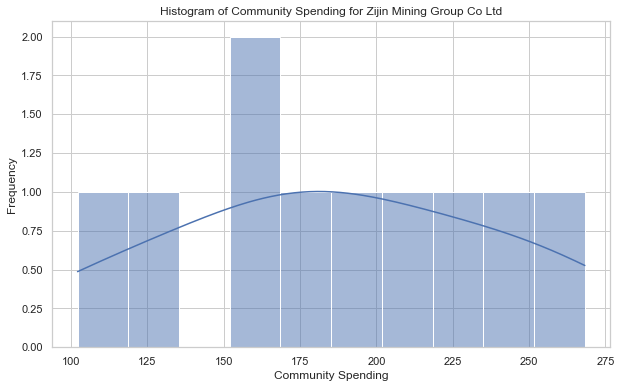

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Data for Zijin Mining Group Co Ltd
zijin_data = {
    'Year': list(range(2013, 2023)),
    'Nitrogen Oxide Emissions': [None, None, None, 1.08, 0.98, 0.88, 0.96, 0.77, 0.89, 0.8],
    'Particulate Emissions': [None, None, None, None, None, None, 0.64, 0.65, 0.75, 0.62],
    'Sulphur Dioxide Emissions': [None, None, None, 2.1, 1.93, 1.33, 1.38, 1.34, 1.48, 1.25],
    'CO2 Scope 1': [None, None, None, 350.16, 418.42, 449.77, 692.29, 1628.49, 2206.14, None],
    'CO2 Scope 2': [None, None, None, 1348.32, 1491.01, 1674.69, 1725.25, 2401.67, 3002.28, None],
    'Total Energy Consumption': [None, None, None, 3356.76, 3753.26, 4253.3, 4900.56, 6669, 12574.7, 15236.9],
    'Fuel Used - Coal/Lignite': [None, None, None, 58.56, 62.36, 68.01, 40.75, 591.65, 840.64, 830.88],
    'Fuel Used - Natural Gas': [None, None, None, 2364.21, 7311.22, 4727.07, 3194.63, 4439.33, 15839, 23750.8],
    'Fuel Used - Crude Oil/Diesel': [None, None, None, 86.91, 89.86, 101.78, 90.73, 249.92, 313.07, 411.82],
    'Hazardous Waste': [None, None, None, 285.95, 259.51, 309.82, 414.01, 79.29, 357.21, 320.81],
    'Total Waste': [None, None, None, 156045, 239326, 191792, 538624, 652259, 756425, 868611],
    'Total Water Withdrawal': [None, None, None, None, None, None, 45230, 50780, 60560, 72710],
    'Total Water Discharged': [None, None, None, None, None, None, 20560, 20820, 42290, 51520],
    'Pct Women in Workforce': [None, None, None, None, None, None, 16.12, 16.14, 15.61, 14.92],
    'Number of Employees- CSR': [23883, 23224, 19011, 17445, 26407, 28179, 36605, 36860, 43876, 48836],
    'Employee Turnover': [None, None, None, None, 8.74, 6.33, 7.68, 9.31, 7.57, 8.66],
    'Total Hours Spent by Firm - Employee Training': [None, None, None, 19843.2, 29973, None, None, 845134, 1368040, 1216600],
    'Number of Independent Directors on Audit Committee': [4, 4, 4, 4, 4, 4, 4, 5, 5, 5],
    'Audit Committee Meetings': [4, 4, 5, 6, 7, 6, 5, 7, 7, 7],
    'Board Size': [11, 11, 12, 11, 11, 11, 11, 13, 13, 13],
    'Number of Executives / Company Managers': [9, 9, 10, 10, 10, 10, 14, 12, 12, 13],
    'Number of Non Executive Directors on Board': [5, 5, 5, 5, 5, 5, 6, 7, 7, 7],
    'Number of Board Meetings for the Year': [21, 22, 37, 24, 21, 19, 22, 31, 17, 25],
    'Board Meeting Attendance Pct': [100, 100, 99.32, 100, 98.26, 95.69, 95.88, 100, 100, 100],
    'Size of Compensation Committee': [6, 6, 6, 6, 6, 6, 6, 6, 6, 5],
    'Num of Independent Directors on Compensation Cmte': [4, 4, 4, 4, 4, 4, 4, 4, 4, 3],
    'Number of Compensation Committee Meetings': [3, 2, 2, 4, 2, 1, 2, 3, 1, 3],
    'Age of the Youngest Director': [37, 39, 40, 41, 42, 43, 44, 45, 46, 47],
    'Age of the Oldest Director': [66, 67, 68, 74, 75, 76, 65, 66, 67, 68],
    'Number of Independent Directors': [4, 4, 4, 4, 4, 4, 5, 6, 6, 6],
    'Size of Nomination Committee': [6, 6, 6, 6, 6, 6, 6, 6, 6, 5],
    'Board Duration (Years)': [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
    'Community Spending': [230, 186, 119.51, 102.11, 154, 207, 166.28, 178, 268.24, 250.67]
}

# Convert the dictionary to a DataFrame
df_zijin = pd.DataFrame(zijin_data)

# Function to plot histograms for the given DataFrame
def plot_company_histograms(df, company_name):
    columns = df.columns[1:]  # Exclude the 'Year' column
    for column in columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[column].dropna(), bins=10, kde=True)
        plt.title(f'Histogram of {column} for {company_name}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

# Function to plot pie charts for the given DataFrame
def plot_company_pie_charts(df, company_name):
    columns = df.columns[1:]  # Exclude the 'Year' column
    for column in columns:
        plt.figure(figsize=(10, 6))
        data = df[column].dropna()
        plt.pie(data, labels=df['Year'][data.index], autopct='%1.1f%%', startangle=140)
        plt.title(f'Pie Chart of {column} for {company_name}')
        plt.show()

# Plot histograms for Zijin Mining Group Co Ltd
plot_company_histograms(df_zijin, 'Zijin Mining Group Co Ltd')




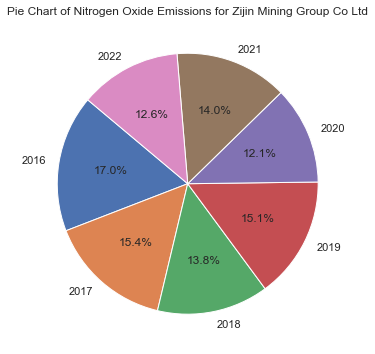

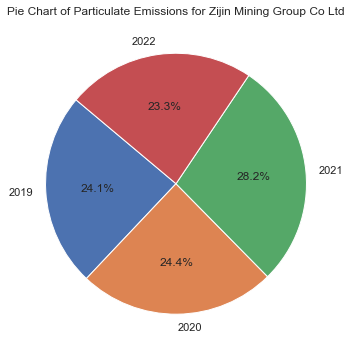

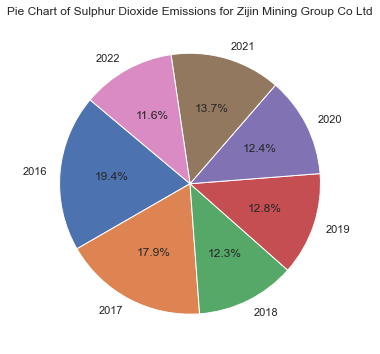

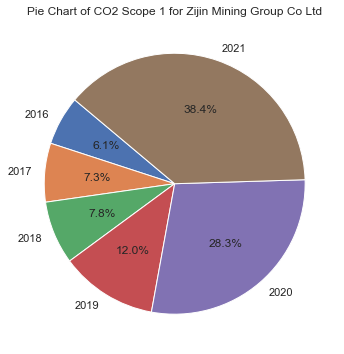

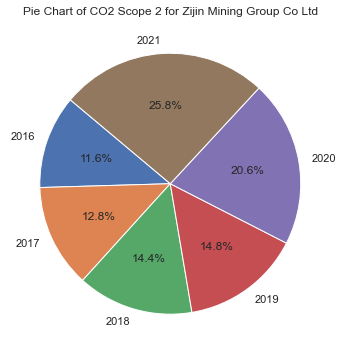

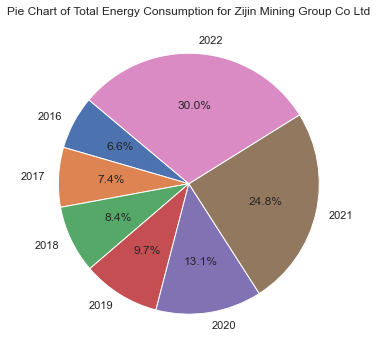

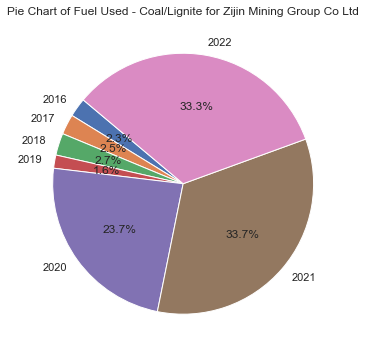

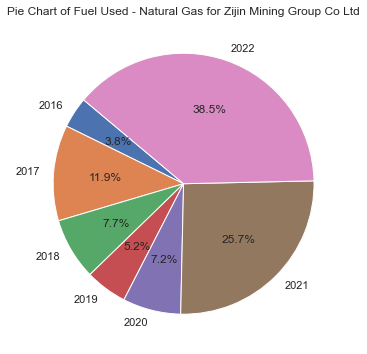

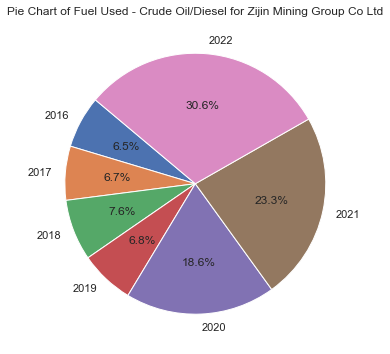

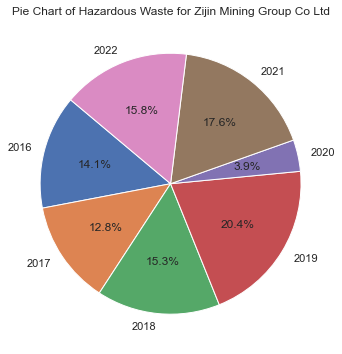

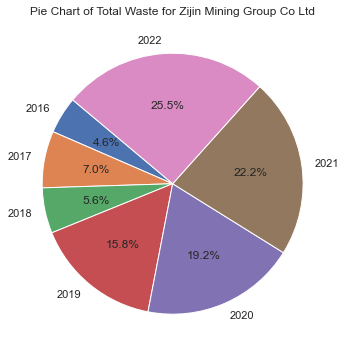

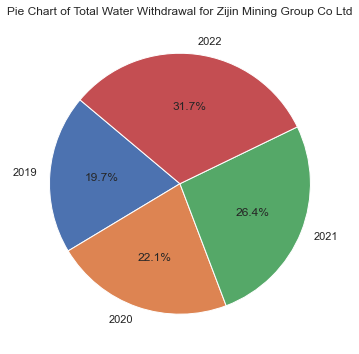

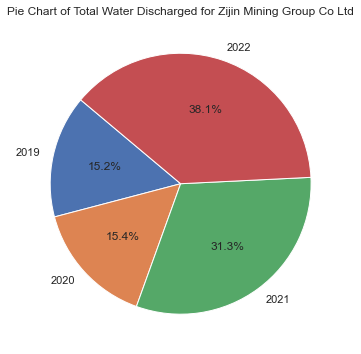

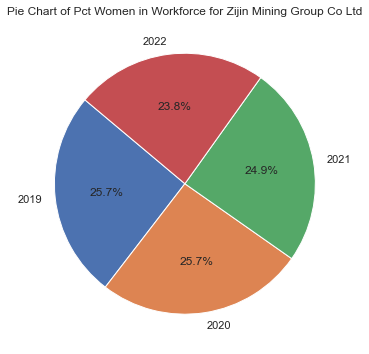

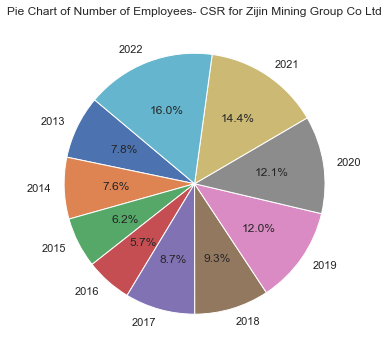

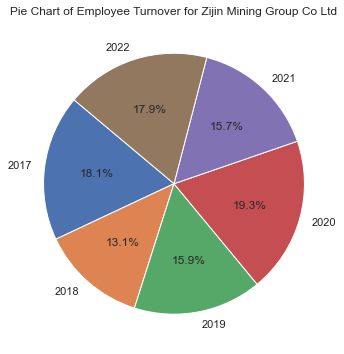

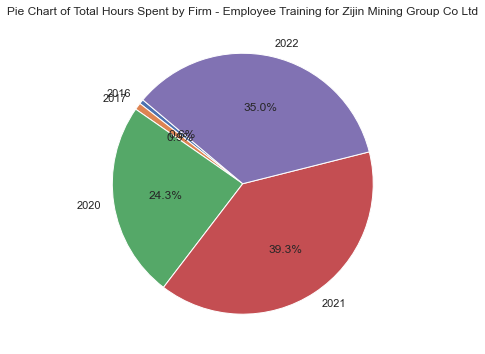

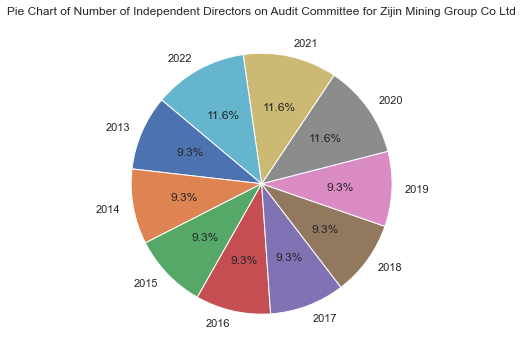

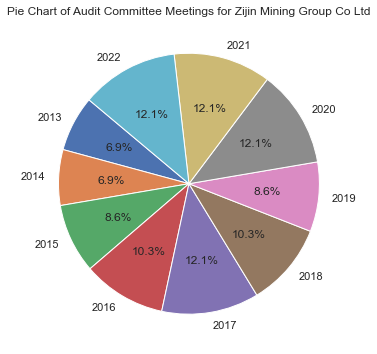

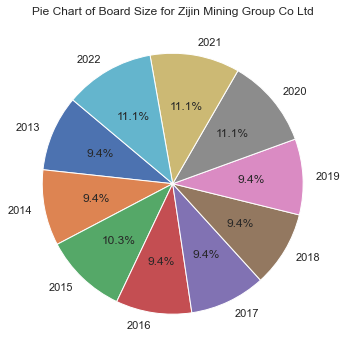

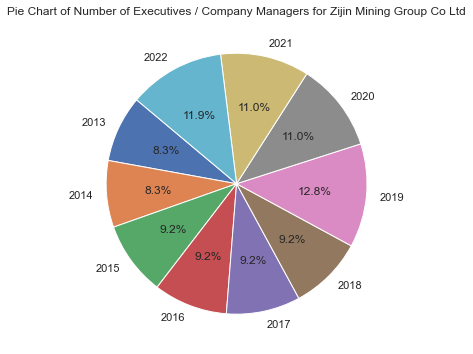

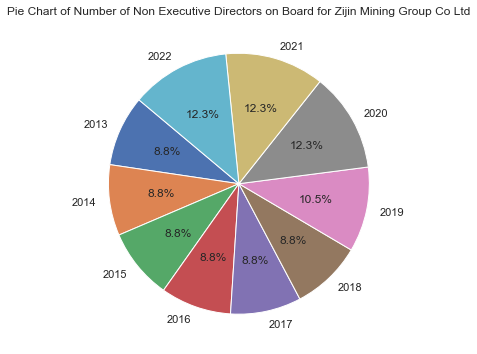

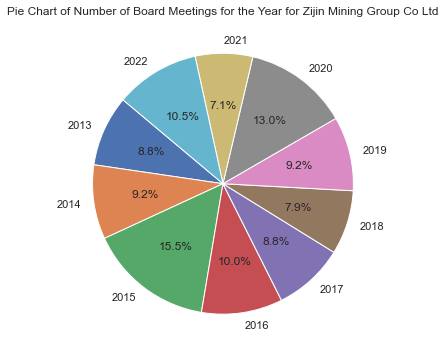

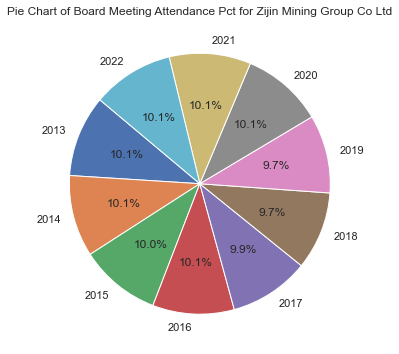

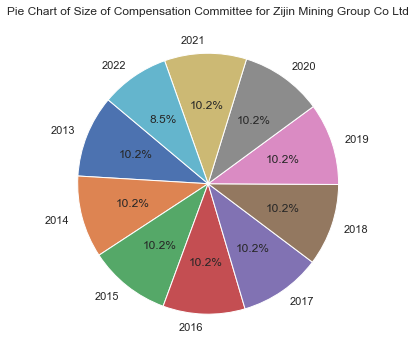

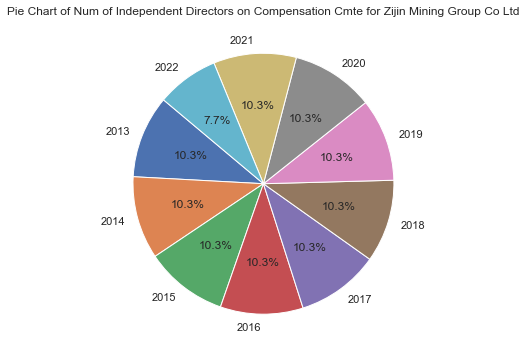

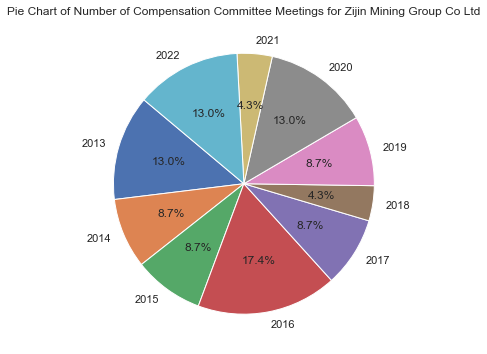

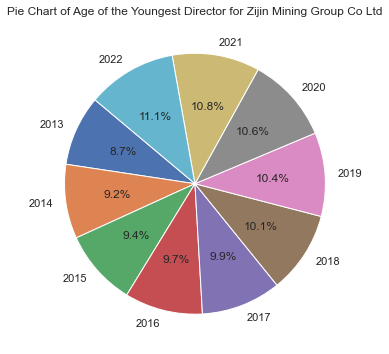

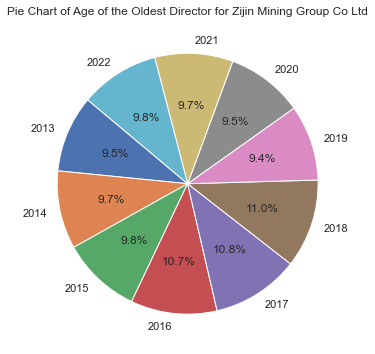

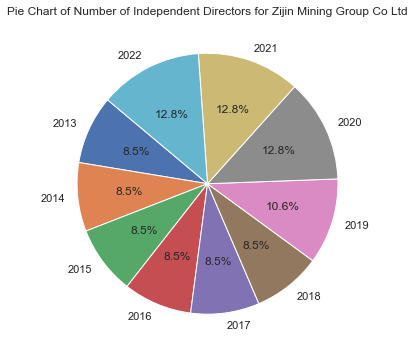

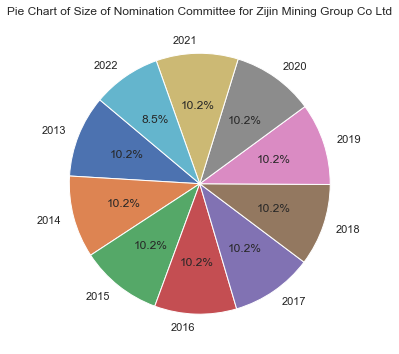

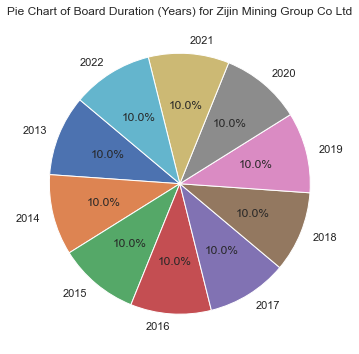

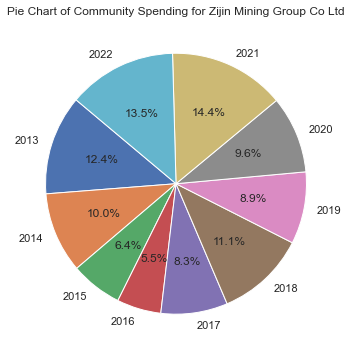

In [32]:
# Plot pie charts for Zijin Mining Group Co Ltd
plot_company_pie_charts(df_zijin, 'Zijin Mining Group Co Ltd')

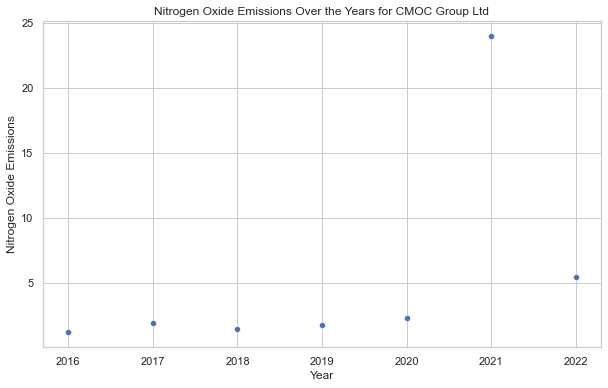

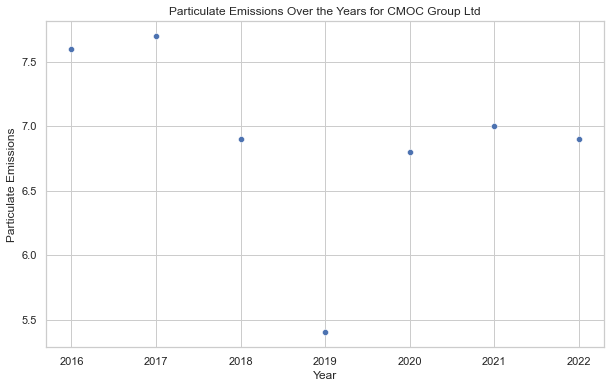

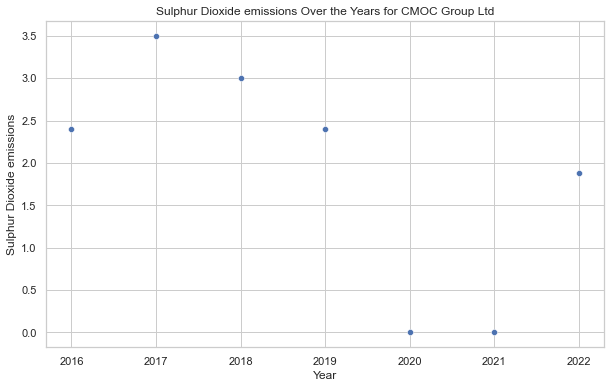

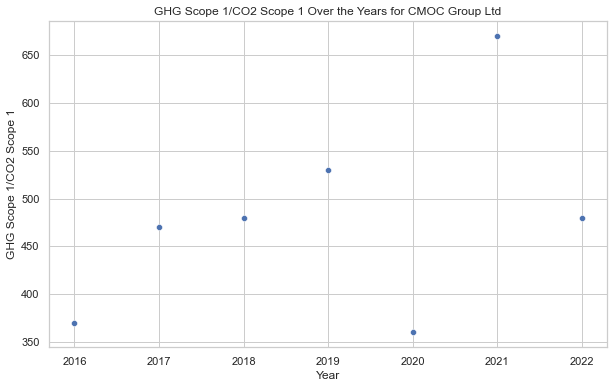

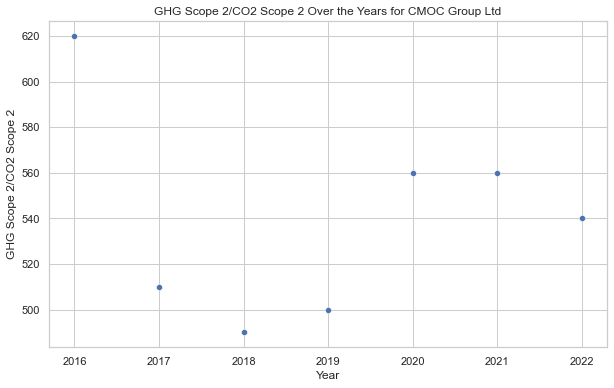

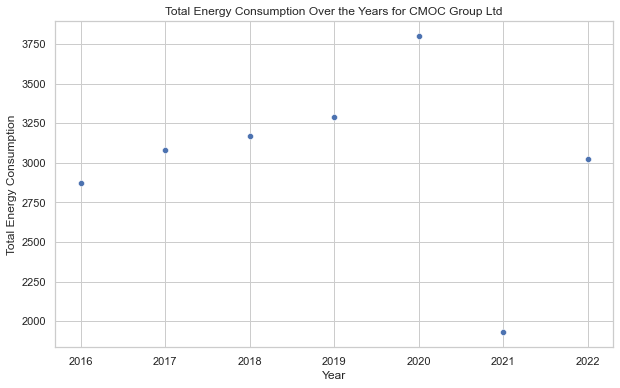

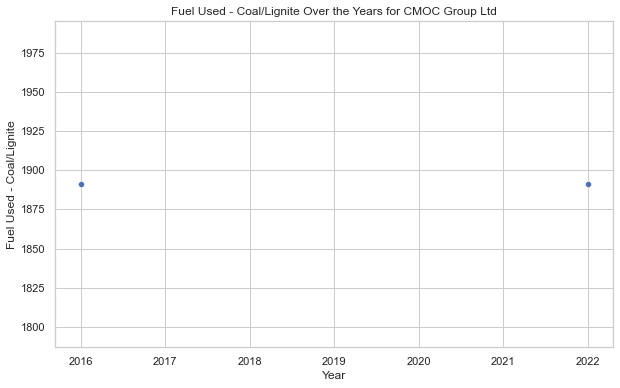

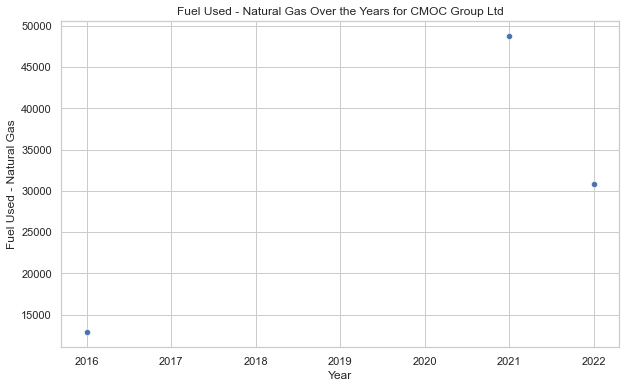

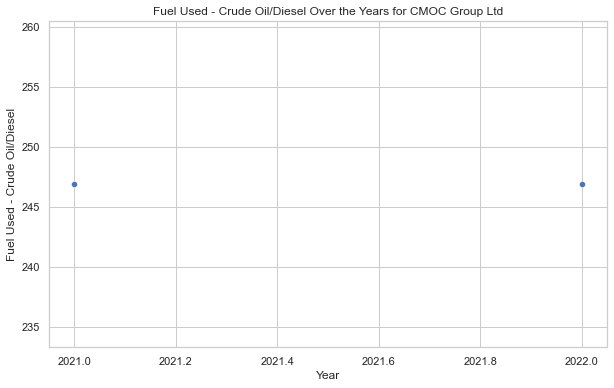

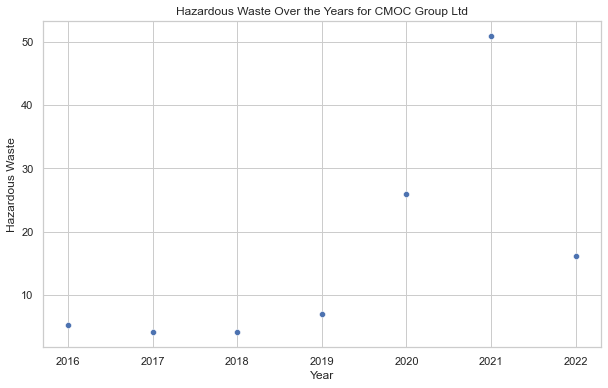

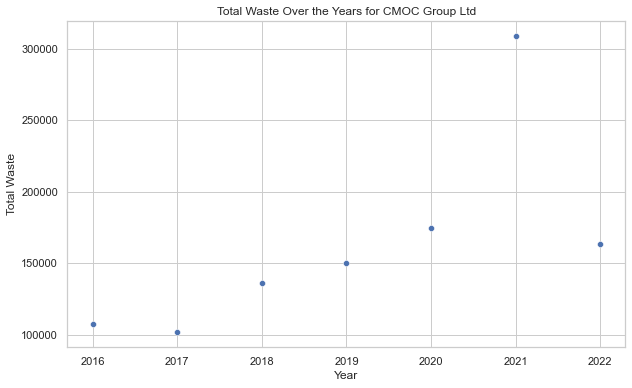

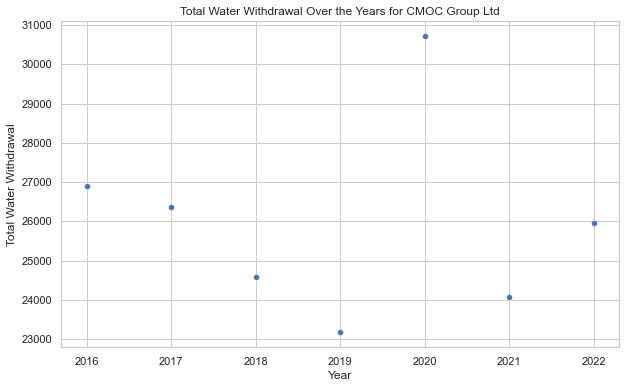

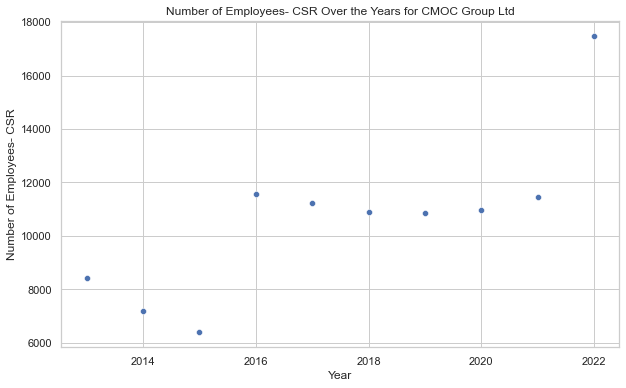

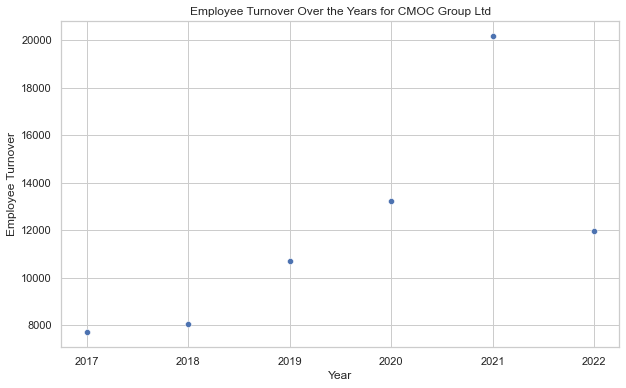

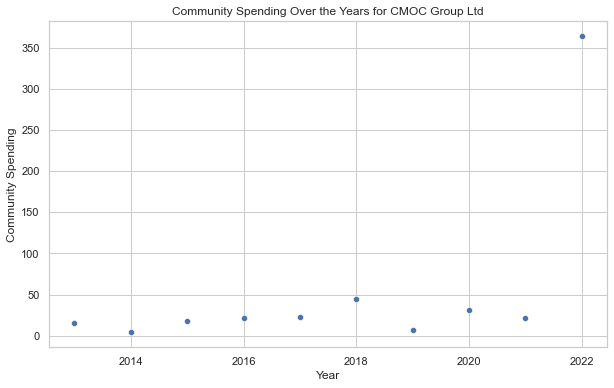

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Data for CMOC Group Ltd
cmoc_data = {
    'Year': list(range(2013, 2023)),
    'Nitrogen Oxide Emissions': [None, None, None, 1.2, 1.9, 1.5, 1.8, 2.3, 24, 5.45],
    'Particulate Emissions': [None, None, None, 7.6, 7.7, 6.9, 5.4, 6.8, 7, 6.9],
    'Sulphur Dioxide emissions': [None, None, None, 2.4, 3.5, 3, 2.4, 0, 0, 1.883333333],
    'GHG Scope 1/CO2 Scope 1': [None, None, None, 370, 470, 480, 530, 360, 670, 480],
    'GHG Scope 2/CO2 Scope 2': [None, None, None, 620, 510, 490, 500, 560, 560, 540],
    'Total Energy Consumption': [None, None, None, 2874, 3080, 3170, 3290, 3800, 1929.32, 3023.886667],
    'Fuel Used - Coal/Lignite': [None, None, None, 1891, None, None, None, None, None, 1891],
    'Fuel Used - Natural Gas': [None, None, None, 12845, None, None, None, None, 48780.5, 30812.75],
    'Fuel Used - Crude Oil/Diesel': [None, None, None, None, None, None, None, None, 246.87, 246.87],
    'Hazardous Waste': [None, None, None, 5.2, 4, 4, 7, 26, 51, 16.2],
    'Total Waste': [None, None, None, 107385, 101615, 136020, 150026, 175047, 309047, 163190],
    'Total Water Withdrawal': [None, None, None, 26902.2, 26375, 24570, 23168, 30723, 24066, 25967.36667],
    'Number of Employees- CSR': [8427, 7207, 6389, 11566, 11226, 10900, 10850, 10956, 11472, 17479],
    'Employee Turnover': [None, None, None, None, 7686, 8048, 10684, 13222, 20186, 11965.2],
    'Community Spending': [15.69, 4.15, 18.04, 21.91, 22.55, 45.26, 7.06, 31.24, 22.2, 364]
}

# Convert the dictionary to a DataFrame
df_cmoc = pd.DataFrame(cmoc_data)

# Function to plot scatter plots for the given DataFrame
def plot_company_scatter(df, company_name):
    columns = df.columns[1:]  # Exclude the 'Year' column
    for column in columns:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x='Year', y=column, data=df)
        plt.title(f'{column} Over the Years for {company_name}')
        plt.xlabel('Year')
        plt.ylabel(column)
        plt.show()

# Plot scatter plots for CMOC Group Ltd
plot_company_scatter(df_cmoc, 'CMOC Group Ltd')


In [34]:
#THE PROJECTION PURSUIT ENTROPY MODEL

## The Projection Pursuit Entropy Model

In [35]:
# Function to compute projection pursuit entropy
def projection_pursuit_entropy(df):
    # Select only numeric columns for processing
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    df_numeric = df[numeric_columns]
    
    # Ensure no NaN values are present before proceeding
    if df_numeric.isna().any().any():
        raise ValueError("NaN values detected in numeric data.")
    
    # Number of samples and indicators
    n_samples, n_indicators = df_numeric.shape
    
    # Random projection direction
    projection_direction = np.random.rand(n_indicators)
    projection_direction /= np.linalg.norm(projection_direction)  # Normalize to unit vector
    
    # Project the data
    projected_data = np.dot(df_numeric, projection_direction)
    
    # Ensure the projected data does not contain NaN values
    if np.isnan(projected_data).any():
        raise ValueError("NaN values detected in projected data.")
    
    # Calculate entropy
    hist, bin_edges = np.histogram(projected_data, bins='auto', density=True)
    hist += np.finfo(float).eps  # Avoid log(0)
    entropy = -np.sum(hist * np.log(hist))
    
    return entropy, projection_direction

# Apply projection pursuit entropy to each company's data
projections = {}
for company in data:
    try:
        entropy, direction = projection_pursuit_entropy(data[company])
        projections[company] = (entropy, direction)
        print(f"\n{company} Projection Entropy: {entropy}\nProjection Direction: {direction}")
    except ValueError as e:
        print(f"Error processing {company}: {e}")



Chengtun Mining Group Co Ltd盛屯矿业 Projection Entropy: -14.078893895422297
Projection Direction: [0.49657443 0.18547017 0.46724186 0.01289751 0.19320136 0.45381521
 0.07901512 0.29200597 0.19003333 0.018562   0.35956954]
Error processing Chifeng Jilong Gold Mining Co Ltd赤峰黄金: NaN values detected in numeric data.

China Nonferrous Metal Industry's Foreign Engineering and Construction Co Ltd中色股份 Projection Entropy: -10.320187656964766
Projection Direction: [0.50897627 0.23264417 0.12987399 0.30004475 0.19201628 0.24635005
 0.39160324 0.00651878 0.39052814 0.35689635 0.2215498 ]

CMOC Group Ltd洛阳钼业 Projection Entropy: -18.67575648310916
Projection Direction: [0.41279215 0.04934146 0.29512566 0.02706488 0.06748475 0.50403897
 0.2152779  0.61160715 0.03642375 0.05475608 0.23663078]

Hunan Gold Corp Ltd湖南黄金 Projection Entropy: -28.147825984628582
Projection Direction: [0.03443187 0.10828339 0.17112327 0.28754455 0.36472416 0.30443177
 0.11848926 0.32870203 0.60853049 0.38054148 0.11052507]

J

C:\Users\n\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning:

Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from current font.

C:\Users\n\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning:

Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.

C:\Users\n\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 30427 (\N{CJK UNIFIED IDEOGRAPH-76DB}) missing from current font.

C:\Users\n\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 23663 (\N{CJK UNIFIED IDEOGRAPH-5C6F}) missing from current font.

C:\Users\n\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 30719 (\N{CJK UNIFIED IDEOGRAPH-77FF}) missing from current font.

C:\Users\n\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 19994 (\N{CJK UNIFIED IDEOGRAPH-4E1A}) missing from current font.

C:\Users\n\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: Use

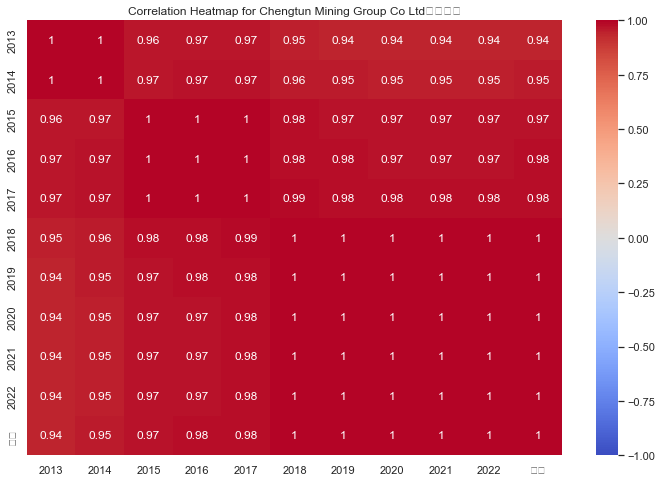

In [36]:
# Function to plot a heatmap of correlations between indicators for a specific company
def plot_heatmap(data, company):
    df = data[company]
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    df = df[numeric_columns]
    corr = df.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlation Heatmap for {company}')
    plt.show()
company_name = 'Chengtun Mining Group Co Ltd盛屯矿业'
indicator_name = 'Nitrogen Oxide Emissions'

# Plot a heatmap of correlations between indicators for a specific company
plot_heatmap(data, company_name)

## RAIGA Optimization

In [82]:
import numpy as np
import random

# Function to initialize the population
def initialize_population(pop_size, dim):
    return np.random.rand(pop_size, dim)

# Function to evaluate fitness
def evaluate_fitness(population, data):
    fitness = []
    for individual in population:
        projected_data = np.dot(data, individual / np.linalg.norm(individual))
        hist, _ = np.histogram(projected_data, bins='auto', density=True)
        hist += np.finfo(float).eps  # Avoid log(0)
        entropy = -np.sum(hist * np.log(hist))
        fitness.append(entropy)
    return np.array(fitness)

# Function for selection
def select_population(population, fitness, num_selected):
    selected_indices = np.argsort(fitness)[:num_selected]
    return population[selected_indices]

# Function for crossover
def crossover(parent1, parent2):
    alpha = random.random()
    child1 = alpha * parent1 + (1 - alpha) * parent2
    child2 = alpha * parent2 + (1 - alpha) * parent1
    return child1, child2

# Function for mutation
def mutate(individual, mutation_rate):
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual[i] += np.random.normal()
    return individual

# Function for immune operation
def immune_operation(population, best_individual):
    immune_population = []
    for individual in population:
        if random.random() < 0.5:
            individual = best_individual + np.random.normal(0, 0.1, size=individual.shape)
        immune_population.append(individual)
    return np.array(immune_population)

# RAIGA function
def raiga_optimization(data, pop_size=50, num_generations=100, mutation_rate=0.01):
    n_samples, n_indicators = data.shape
    population = initialize_population(pop_size, n_indicators)
    best_fitness = float('inf')
    best_individual = None
    
    for generation in range(num_generations):
        fitness = evaluate_fitness(population, data)
        
        if np.min(fitness) < best_fitness:
            best_fitness = np.min(fitness)
            best_individual = population[np.argmin(fitness)]
        
        selected_population = select_population(population, fitness, pop_size // 2)
        new_population = []
        
        for i in range(0, len(selected_population), 2):
            if i + 1 < len(selected_population):
                child1, child2 = crossover(selected_population[i], selected_population[i + 1])
                new_population.append(mutate(child1, mutation_rate))
                new_population.append(mutate(child2, mutation_rate))
        
        population = np.array(new_population)
        population = immune_operation(population, best_individual)
    
    return best_individual, best_fitness

# Apply RAIGA optimization to each company's data
optimized_projections = {}
for company in data:
    try:
        best_projection, best_fitness = raiga_optimization(data[company].select_dtypes(include=[np.number]).values)
        optimized_projections[company] = (best_projection, best_fitness)
        print(f"\n{company} Best Fitness: {best_fitness}\nBest Projection Direction: {best_projection}")
    except ValueError as e:
        print(f"Error processing {company}: {e}")



Chengtun Mining Group Co Ltd盛屯矿业 Best Fitness: -7793121.20750994
Best Projection Direction: [ 0.36796224  1.09393936 -0.09309428  0.63955323 -0.67273263 -0.00731474
 -0.365604    0.29383659  0.50382181 -0.31348995 -0.09800564]
Error processing Chifeng Jilong Gold Mining Co Ltd赤峰黄金: autodetected range of [nan, nan] is not finite

China Nonferrous Metal Industry's Foreign Engineering and Construction Co Ltd中色股份 Best Fitness: -98327.68179267956
Best Projection Direction: [-0.49702695  0.29734321  0.55048096 -0.49502718  0.70237105 -0.17259872
  0.19317799 -0.15477092  1.20504207 -1.57482429  0.48604412]

CMOC Group Ltd洛阳钼业 Best Fitness: -12576.870405625887
Best Projection Direction: [-1.71058831  0.71361725  0.78372021  0.69195947 -0.10287658 -0.10219392
  0.25085941  0.48782978  0.38940011 -0.29232146 -0.63861697]

Hunan Gold Corp Ltd湖南黄金 Best Fitness: -1420962.3054856334
Best Projection Direction: [ 0.52540551  0.07196754  0.37681853  0.24321194  0.78195678 -0.23957157
  0.14393306 -0.

C:\Users\n\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 30427 (\N{CJK UNIFIED IDEOGRAPH-76DB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\n\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 23663 (\N{CJK UNIFIED IDEOGRAPH-5C6F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\n\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 30719 (\N{CJK UNIFIED IDEOGRAPH-77FF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\n\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 19994 (\N{CJK UNIFIED IDEOGRAPH-4E1A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\n\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\n

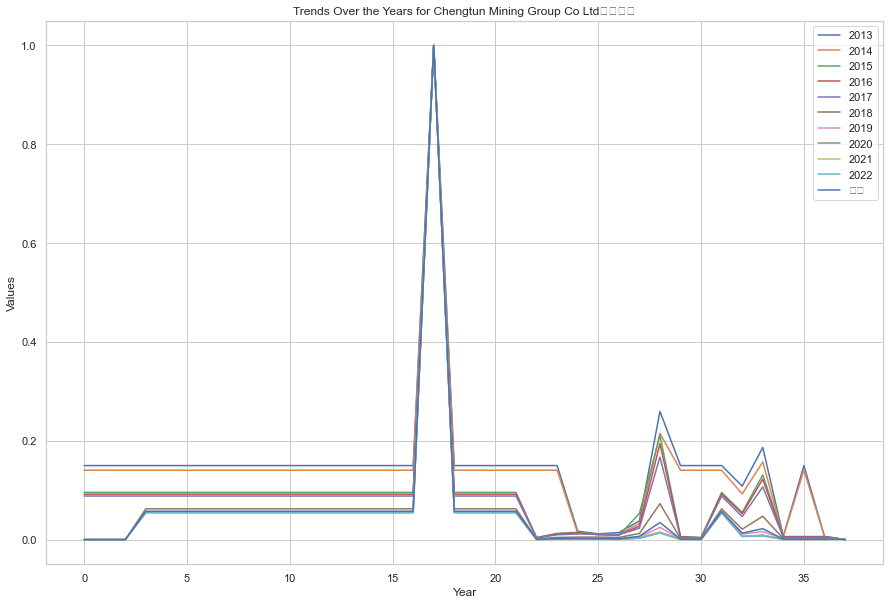

In [83]:
#Some EDA charts before the Coupling Coordination Degree Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Example usage of the functions
company_name = 'Chengtun Mining Group Co Ltd盛屯矿业'
indicator_name = 'Nitrogen Oxide Emissions'

# Set the style for seaborn
sns.set(style="whitegrid")

# Function to plot trends over the years for a specific company
def plot_trends(data, company):
    df = data[company]
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    df = df[numeric_columns]
    df.plot(figsize=(15, 10))
    plt.title(f'Trends Over the Years for {company}')
    plt.xlabel('Year')
    plt.ylabel('Values')
    plt.legend(loc='best')
    plt.show()
# Plot trends over the years for a specific company
plot_trends(data, company_name)

## Coupling Coordination Degree Analysis

In [84]:
import numpy as np

# Function to calculate the coupling degree
def calculate_coupling_degree(subsystems):
    n = len(subsystems)
    subsystems_with_eps = subsystems + np.finfo(float).eps  # Add epsilon to avoid zero values
    A = np.prod(subsystems_with_eps)
    B = np.sum([np.prod(subsystems_with_eps) / subsystems_with_eps[i] for i in range(n)])  # Adding epsilon to avoid division by zero
    C = (A / B) ** (1 / n)
    return C

# Function to calculate the coordination degree
def calculate_coordination_degree(subsystems, weights):
    T = np.dot(subsystems, weights)
    D = np.sqrt(np.sum(weights * ((subsystems / (T + np.finfo(float).eps)) ** 2)))  # Adding epsilon to avoid division by zero
    return D

# Function to perform Coupling Coordination Degree Analysis
def coupling_coordination_analysis(data, weights):
    # Select only numeric columns for processing
    numeric_columns = data.select_dtypes(include=[np.number]).columns
    df_numeric = data[numeric_columns]
    
    # Calculate subsystems values
    subsystems = df_numeric.mean(axis=0).values  # Mean values for each indicator as subsystem values
    
    # Normalize the subsystems values
    subsystems_range = subsystems.max() - subsystems.min()
    if subsystems_range == 0:  # If the range is zero, avoid division by zero
        subsystems_range = np.finfo(float).eps
    subsystems = (subsystems - subsystems.min()) / subsystems_range
    
    # Calculate the coupling degree
    coupling_degree = calculate_coupling_degree(subsystems)
    
    # Calculate the coordination degree
    coordination_degree = calculate_coordination_degree(subsystems, weights)
    
    return coupling_degree, coordination_degree

# Define weights for each indicator (assuming equal weights for simplicity)
num_indicators = len(data['Chengtun Mining Group Co Ltd盛屯矿业'].select_dtypes(include=[np.number]).columns)
weights = np.ones(num_indicators) / num_indicators

# Apply Coupling Coordination Degree Analysis to each company's data
coordination_results = {}
for company in data:
    try:
        coupling_degree, coordination_degree = coupling_coordination_analysis(data[company], weights)
        coordination_results[company] = (coupling_degree, coordination_degree)
        print(f"\n{company} Coupling Degree: {coupling_degree}\nCoordination Degree: {coordination_degree}")
    except ValueError as e:
        print(f"Error processing {company}: {e}")
    except Exception as e:
        print(f"Unexpected error processing {company}: {e}")



Chengtun Mining Group Co Ltd盛屯矿业 Coupling Degree: 0.03775279513763828
Coordination Degree: 1.55936788234145
Error processing Chifeng Jilong Gold Mining Co Ltd赤峰黄金: shapes (12,) and (11,) not aligned: 12 (dim 0) != 11 (dim 0)

China Nonferrous Metal Industry's Foreign Engineering and Construction Co Ltd中色股份 Coupling Degree: 0.03775279513763895
Coordination Degree: 1.2382731357041459

CMOC Group Ltd洛阳钼业 Coupling Degree: 0.03775279513763889
Coordination Degree: 1.5777778009018244

Hunan Gold Corp Ltd湖南黄金 Coupling Degree: 0.037752795137638955
Coordination Degree: 1.1537616783740072

Jinduicheng Molybdenum Co Ltd金钼股份 Coupling Degree: 0.03775279513763894
Coordination Degree: 1.3051964851916042

RISING NONFERROUS METAL SH广晟有色 Coupling Degree: 0.037752795137638955
Coordination Degree: 1.204127434663966

SHANDONG GOLD MINING CO LT山东黄金 Coupling Degree: 0.037752795137638746
Coordination Degree: 1.552201452610545

Shengda Resources Co Ltd盛达资源 Coupling Degree: 0.03775279513763819
Coordination Degr

### SUMMARY

## ****THE END***